In [143]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the NetCDF file
file_path = '/glade/work/wchuang/mlmicrophysics/cesm_output/tauREV4/cam_ml_tauREV4_train.cam.h1.2005-01-01-00000.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
cesm_ds = xr.open_dataset(file_path)

file_path = '/glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000_filter01.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
e3sm_ds = xr.open_dataset(file_path)

In [4]:
# Choose a variable to plat
cesm_variable = "CLOUD"
e3sm_varable = "CLOUD"

In [114]:
cesm_data = cesm_ds["CLOUD"].values.flatten()
e3sm_data = e3sm_ds["CLOUD"].values.flatten()

In [115]:
if cesm_variable == "CLOUD":
    filter = cesm_data > 1e-2
    cesm_data = cesm_data[filter]
    filter = e3sm_data > 1e-2
    e3sm_data = e3sm_data[filter]

In [116]:
cesm_data

array([0.01016432, 0.02526424, 0.01576067, ..., 0.11701499, 0.11701499,
       0.11701499])

In [117]:
e3sm_data

array([0.01280052, 0.10402622, 0.6733751 , ..., 0.48451313, 1.        ,
       1.        ], dtype=float32)

In [118]:
print ("length of cesm data = ", len(cesm_data))
print ("length of e3sm data = ", len(e3sm_data))

length of cesm data =  11956490
length of e3sm data =  8061096


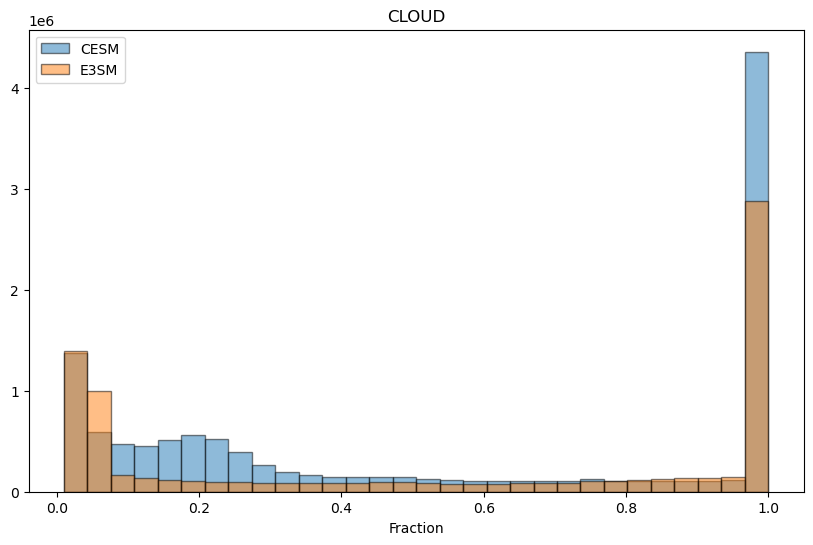

In [120]:
plt.figure(figsize=(10, 6));
plt.hist(cesm_data, bins=30, alpha=0.5, label="CESM", edgecolor='black');
plt.hist(e3sm_data, bins=30, alpha=0.5, label="E3SM", edgecolor='black');
plt.legend(loc='upper left')
plt.title("CLOUD")
plt.xlabel("Fraction")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_CLOUD.png", format="png")
plt.show();

In [141]:
cesm_ds

<xarray.Dataset>
Dimensions:       (lat: 192, lon: 288, lev: 32, ilev: 33, trop_cld_lev: 32,
                   time: 32, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * time          (time) object 2005-01-01 00:00:00 ... 2005-01-30 17:00:00
Dimensions without coordinates: nbnd
Data variables: (12/45)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    RHO_CLUBB     (time, lev, lat, lon) float64 ...
    T             (time, lev, lat, lon) float64 ...
    nctend_TAU    (time, trop_cld_lev, lat, lon) float64 ...
    nrtend_TAU    (time, trop_cld_lev, lat, lon) float64 ...
    qctend_TAU    (time, trop_cld_lev, lat, lon) float64 ...
    qrtend_TAU    (time, trop_cld_lev, lat, lon) float64 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              cam_ml_tauREV4_train
    logname:           andrew
    host:              derecho4
    initial_file:      /glade/campaign/cesm/cesmdata/inputdata/atm/cam/inic/f...
    topography_file:   /glade/campaign/cesm/cesmdata/inputdata/atm/cam/topo/f...
    model_doi_url:     not_set
    time_period_freq:  hour_23

In [14]:
e3sm_ds

<xarray.Dataset>
Dimensions:            (time: 32, lev: 80, ncol: 21600, ilev: 81)
Coordinates:
  * lev                (lev) float64 0.1236 0.1819 0.2674 ... 986.2 993.8 998.5
  * ilev               (ilev) float64 0.1 0.1472 0.2166 ... 990.5 997.0 1e+03
  * time               (time) object 2001-07-04 00:00:00 ... 2001-08-02 17:00:00
Dimensions without coordinates: ncol
Data variables: (12/20)
    T                  (time, lev, ncol) float32 ...
    RHO_CLUBB          (time, ilev, ncol) float32 ...
    CLOUD              (time, lev, ncol) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    FREQR              (time, lev, ncol) float32 ...
    P3_qc_in_TAU       (time, lev, ncol) float32 ...
    P3_nc_in_TAU       (time, lev, ncol) float32 ...
    ...                 ...
    P3_qrtend_TAU_raw  (time, lev, ncol) float32 ...
    P3_nrtend_TAU_raw  (time, lev, ncol) float32 ...
    P3_mu_c            (time, lev, ncol) float32 ...
    P3_lamc            (time, lev, ncol) float32 ...
    P3_lamr            (time, lev, ncol) float32 ...
    P3_nr              (time, lev, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    fv_nphys:          2
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         a67353c6a2
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@llnl.gov
    initial_file:      /global/cfs/cdirs/e3sm/inputdata/atm/cam/inic/homme/ea...
    topography_file:   /global/cfs/cdirs/e3sm/inputdata/atm/cam/topo/USGS-gto...
    time_period_freq:  hour_23

In [ ]:
# Filtering the data
e3sm_ds_filtered = e3sm_ds.where(((e3sm_ds.CLOUD > 1e-2) & (e3sm_ds.P3_qc_in_TAU > 1e-6) & (e3sm_ds.P3_qctend_TAU_raw < 0)), drop=True)
e3sm_ds_filtered.to_netcdf("/glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000_filter02_training.nc")
# del cesm_ds

In [ ]:
# Filtering the data
cesm_ds_filtered = cesm_ds.where(((cesm_ds.CLOUD > 1e-2) & (cesm_ds.QC_TAU_in > 1e-6) & (cesm_ds.qctend_TAU < 0)), drop=True)
# del cesm_ds

In [ ]:
cesm_ds_filtered2 = cesm_ds_filtered.where(cesm_ds_filtered.QC_TAU_in > 1e-6, drop=True)
del cesm_ds_filtered

## Plots with raw data

### QC_TAU_in

In [121]:
cesm_data = cesm_ds["QC_TAU_in"]
e3sm_data = e3sm_ds["P3_qc_in_TAU"]

In [122]:
cesm_df = np.log10(cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [123]:
bins = [i/2 for i in range(-36, 0, 1)]

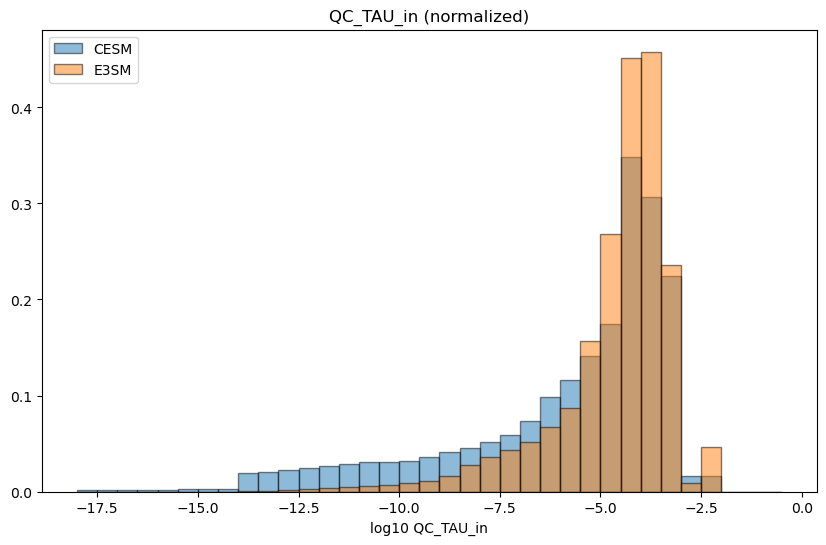

In [124]:
xscale = "linear"
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=True);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=True);
plt.legend(loc='upper left')
plt.title("QC_TAU_in (normalized)")
plt.xlabel("log10 QC_TAU_in")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_QC_TAU_in.png")
plt.show();

### QR_TAU_in

In [125]:
cesm_data = cesm_ds["QR_TAU_in"]
e3sm_data = e3sm_ds["P3_qr_in_TAU"]

In [126]:
cesm_df = np.log10(cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [127]:
bins = [i/2 for i in range(-36, 0, 1)]

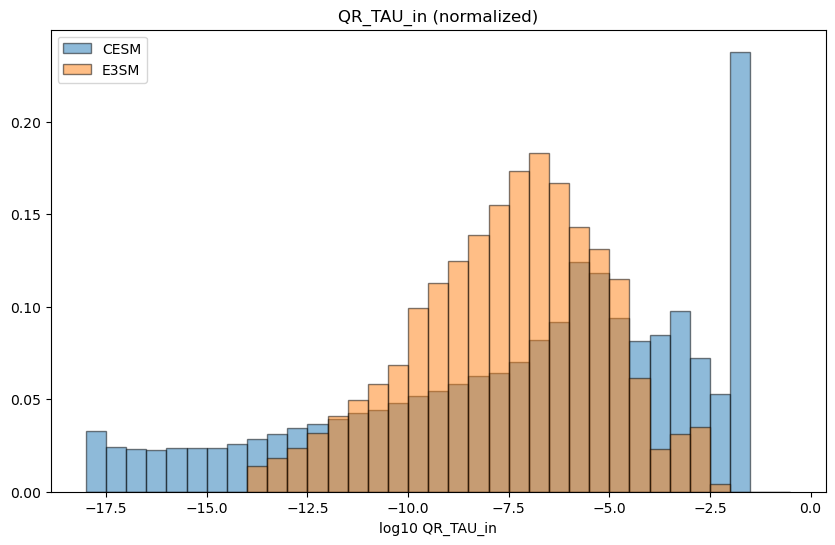

In [128]:
xscale = "linear"
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=True);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=True);
plt.legend(loc='upper left')
plt.title("QR_TAU_in (normalized)")
plt.xlabel("log10 QR_TAU_in")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_QR_TAU_in.png")
plt.show();

### NC_TAU_in

In [129]:
cesm_data = cesm_ds["NC_TAU_in"]
e3sm_data = e3sm_ds["P3_nc_in_TAU"]

In [130]:
cesm_df = np.log10(cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [131]:
bins = [i/6 for i in range(-12, 0, 54)]

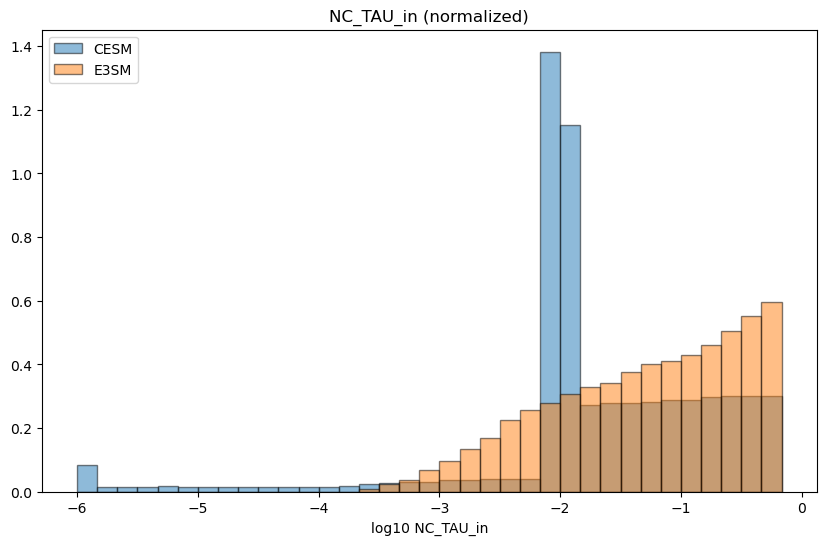

In [132]:
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("NC_TAU_in (normalized)")
plt.xlabel("log10 NC_TAU_in")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_NC_TAU_in.png")
plt.show();

### NR_TAU_in

In [133]:
cesm_data = cesm_ds["NR_TAU_in"]
e3sm_data = e3sm_ds["P3_nr_in_TAU"]

In [134]:
cesm_df = np.log10(cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [135]:
bins = [i/3 for i in range(-36, 0, 1)]

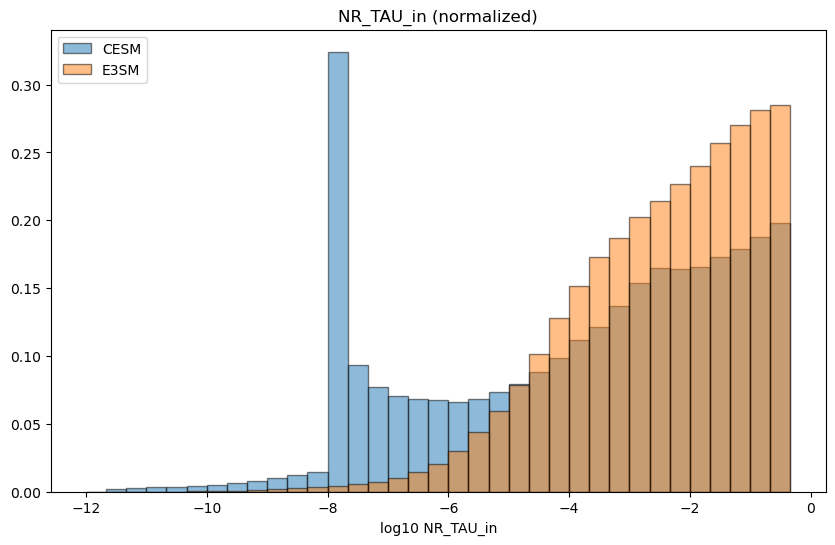

In [136]:
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("NR_TAU_in (normalized)")
plt.xlabel("log10 NR_TAU_in")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_NR_TAU_in.png")
plt.show();

### PGAM

In [188]:
cesm_data = cesm_ds["PGAM"]
e3sm_data = e3sm_ds["P3_mu_c"]

In [138]:
# cesm_df = np.log10(cesm_data)
# cesm_df = cesm_df.where(cesm_df != -np.inf)
# e3sm_df = np.log10(e3sm_data)
# e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

In [191]:
bins = range(-110, 20, 1)

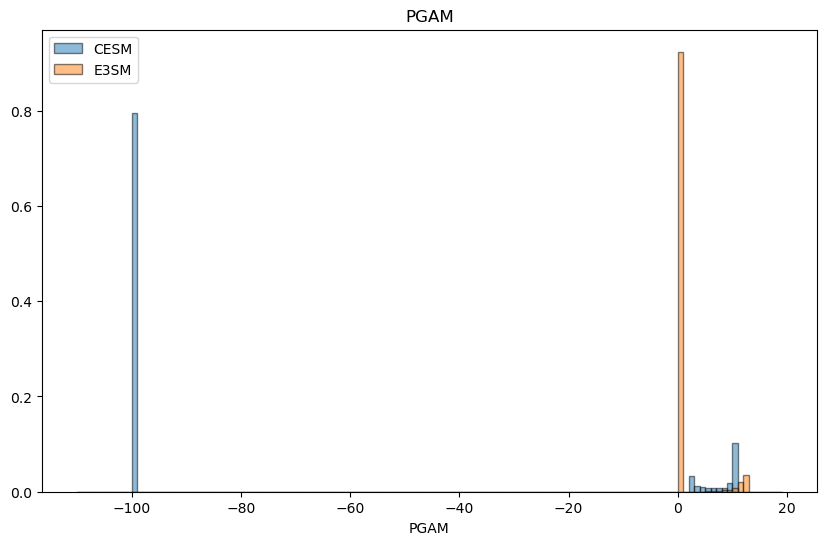

In [192]:
# bins = 30
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_data, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_data, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("PGAM (normalized)")
plt.xlabel("PGAM")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_PGAM.png")
plt.show();

### qctend_TAU

In [240]:
cesm_data = cesm_ds["qctend_TAU"]
e3sm_data = e3sm_ds["P3_qctend_TAU_raw"]

In [241]:
cesm_data.to_series().describe()

count    5.662310e+07
mean    -4.184086e-08
std      3.716447e-07
min     -8.333333e-06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: qctend_TAU, dtype: float64

In [242]:
cesm_df = np.log10(-cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(-e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [243]:
bins = [i/2 for i in range(-60, 0, 1)]

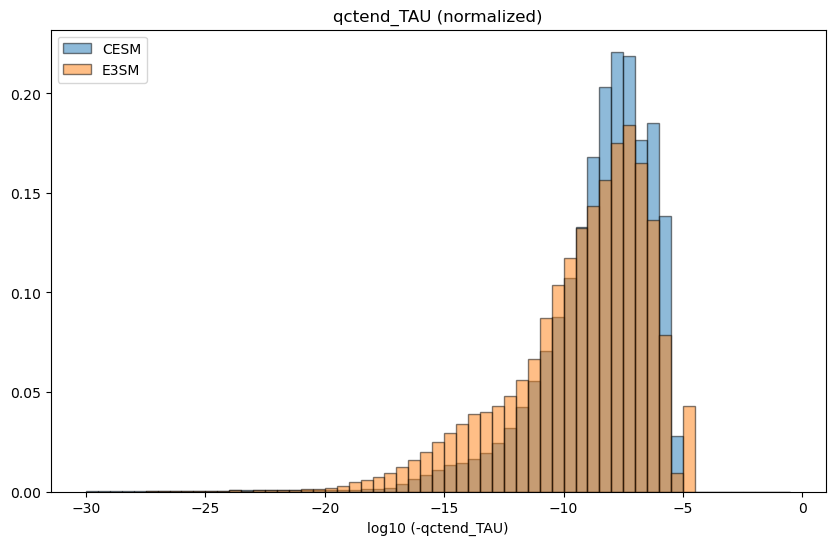

In [244]:
# bins=20
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("qctend_TAU (normalized)")
plt.xlabel("log10 (-qctend_TAU)")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_qctend_TAU.png")
plt.show();

### qrtend_TAU

In [262]:
cesm_data = cesm_ds["qrtend_TAU"]
e3sm_data = e3sm_ds["P3_qrtend_TAU_raw"]

In [263]:
e3sm_data.to_series().describe()

count    5.529600e+07
mean     3.684543e-08
std      6.721939e-07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.700000e-05
Name: P3_qrtend_TAU_raw, dtype: float64

In [264]:
cesm_df = np.log10(cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [265]:
cesm_df.to_series().describe()

count    8.556624e+06
mean    -8.834809e+00
std      5.233640e+00
min     -1.333110e+02
25%     -9.645773e+00
50%     -8.084190e+00
75%     -6.939145e+00
max     -5.079181e+00
Name: qrtend_TAU, dtype: float64

In [266]:
e3sm_df.to_series().describe()

count    4.047765e+06
mean    -9.434112e+00
std      3.235506e+00
min     -3.792554e+01
25%     -1.083740e+01
50%     -8.690063e+00
75%     -7.192047e+00
max     -4.769551e+00
Name: P3_qrtend_TAU_raw, dtype: float64

In [267]:
bins = [i for i in range(-140, 0, 2)]

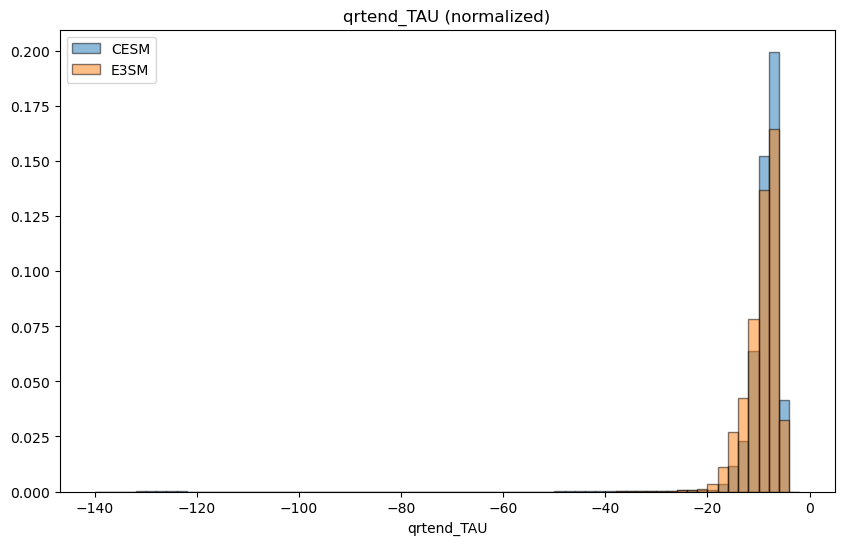

In [268]:
# bins=30
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("qrtend_TAU (normalized)")
plt.xlabel("log10 qrtend_TAU")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_qrtend_TAU.png")
plt.show();

### nctend_TAU

In [252]:
cesm_data = cesm_ds["nctend_TAU"]
e3sm_data = e3sm_ds["P3_nctend_TAU_raw"]

In [253]:
cesm_data.to_series().describe()

count    5.662310e+07
mean    -1.931700e+03
std      1.305270e+04
min     -3.868475e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: nctend_TAU, dtype: float64

In [254]:
cesm_df = np.log10(-cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(-e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [255]:
bins = [i/2 for i in range(-40, 20, 1)]

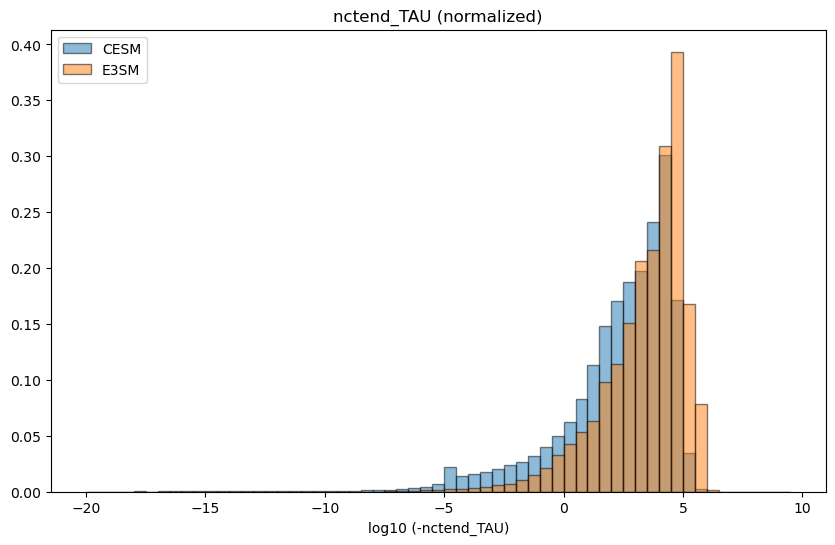

In [256]:
# bins=30
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("nctend_TAU (normalized)")
plt.xlabel("log10 (-nctend_TAU)")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_nctend_TAU.png")
plt.show();

### nrtend_TAU

In [257]:
cesm_data = cesm_ds["nrtend_TAU"]
e3sm_data = e3sm_ds["P3_nrtend_TAU_raw"]

In [258]:
cesm_data.to_series().describe()

count    5.662310e+07
mean     2.325844e+15
std      1.750142e+19
min     -6.631456e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.316952e+23
Name: nrtend_TAU, dtype: float64

In [259]:
cesm_df = np.log10(-cesm_data)
cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(-e3sm_data)
e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


In [260]:
bins = [i/2 for i in range(-40, 20, 1)]

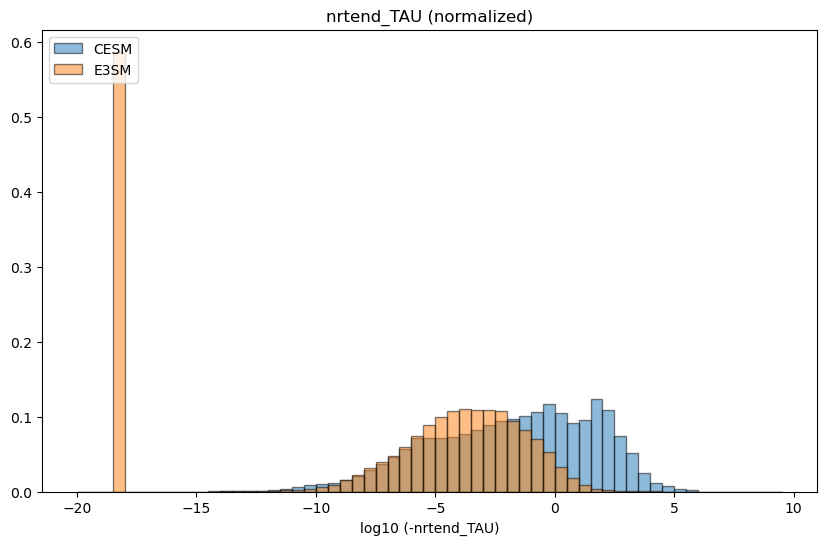

In [261]:
# bins=30
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
xr.plot.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale, density=density);
xr.plot.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale, density=density);
plt.legend(loc='upper left')
plt.title("nrtend_TAU (normalized)")
plt.xlabel("log10 (-nrtend_TAU)")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_nrtend_TAU.png")
plt.show();

In [11]:
plot_variables = ["QC_TAU_in",
                  "QR_TAU_in",
                  "NC_TAU_in",
                  "NR_TAU_in",
                  "PGAM",
                  "LAMC",
                  "LAMR",
                  "N0R",
                  "RHO_CLUBB",
                  "CLOUD",
                  "FREQR",
                 ]
e3sm_equivalent = ["P3_qc_in_TAU", 
                   "P3_qr_in_TAU",
                   "P3_nc_in_TAU", 
                   "P3_nr_in_TAU", 
                   # "P3_qc_out_TAU",
                   # "P3_nc_out_TAU",
                   # "P3_qr_out_TAU",
                   # "P3_nr_out_TAU",
                   # "P3_qctend_TAU_raw",
                   # "P3_nctend_TAU_raw",
                   # "P3_qrtend_TAU_raw",
                   # "P3_nrtend_TAU_raw",
                   "P3_mu_c",
                   "P3_lamc",
                   "P3_lamr",
                   "P3_nr",
                   "RHO_CLUBB",
                   "CLOUD",
                   "FREQR",
                  ]

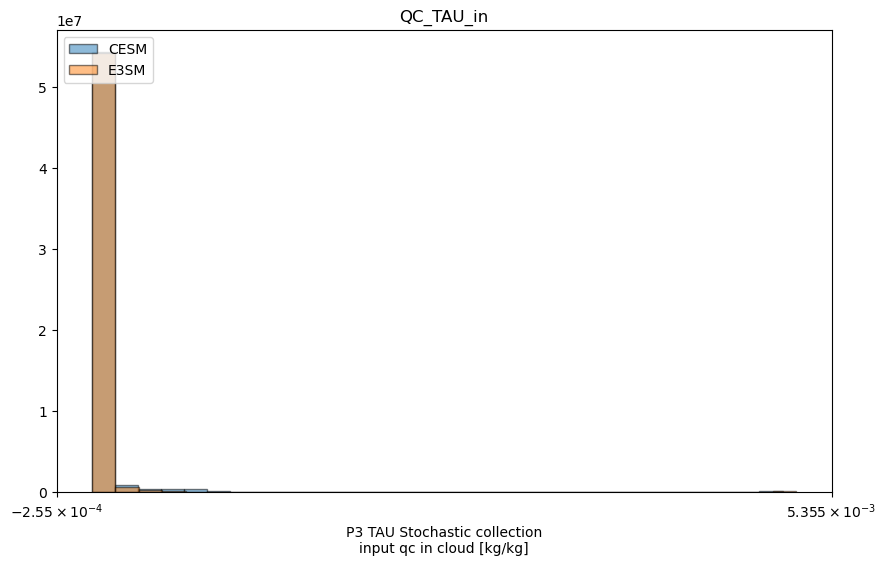

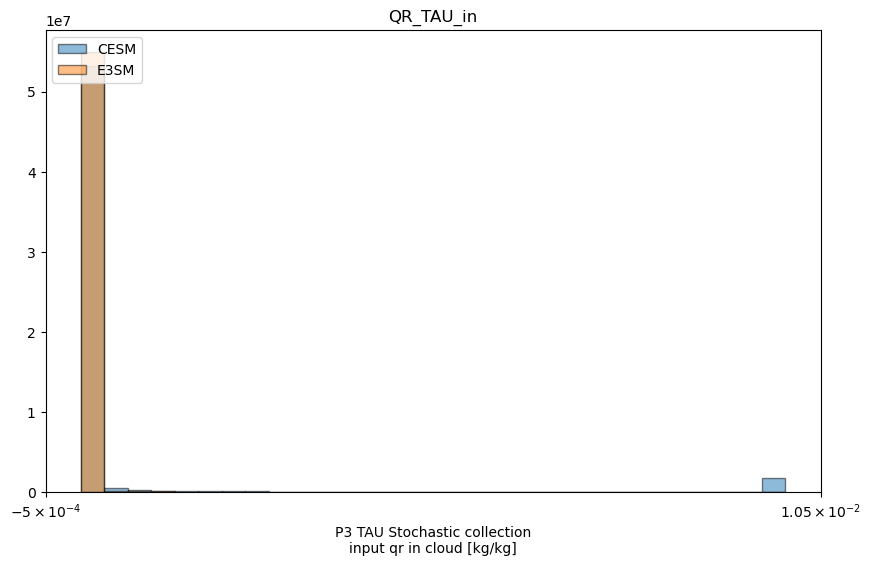

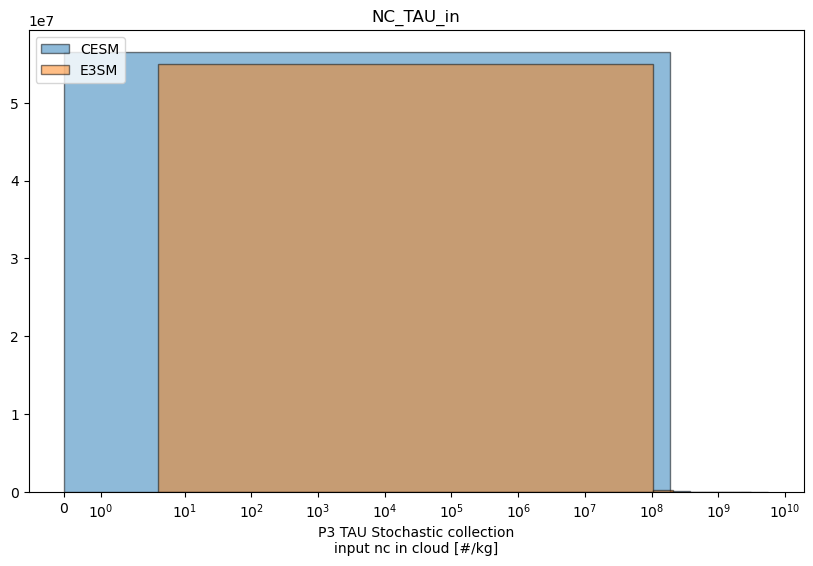

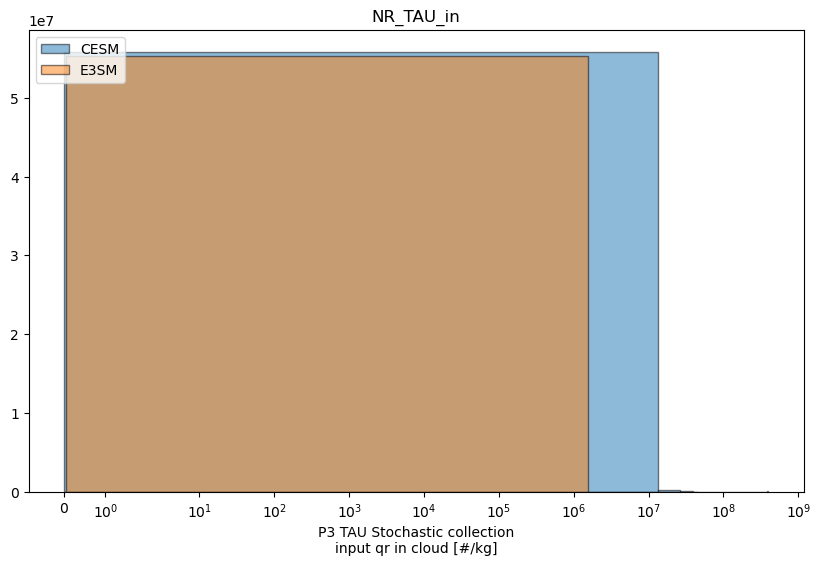

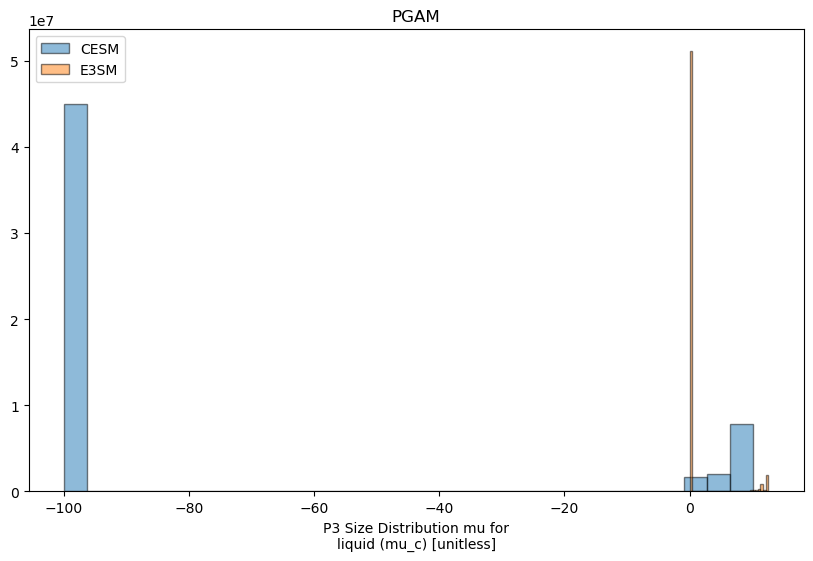

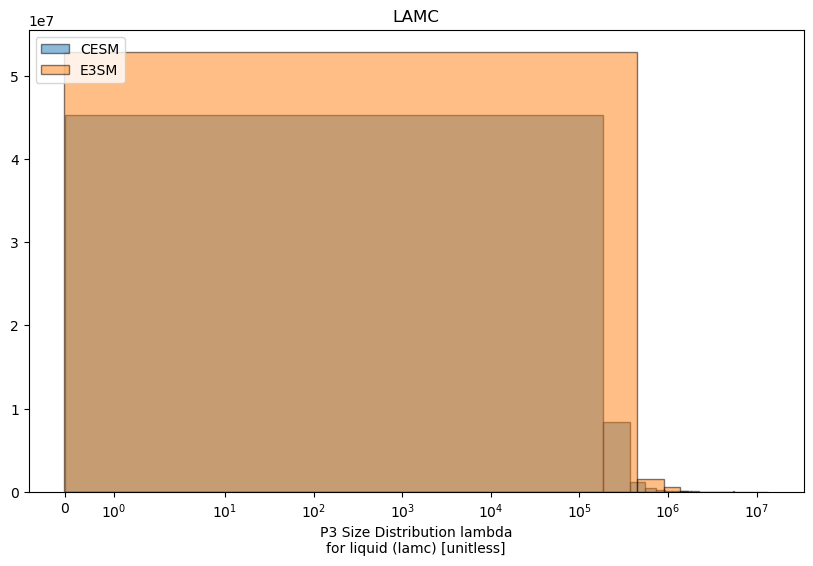

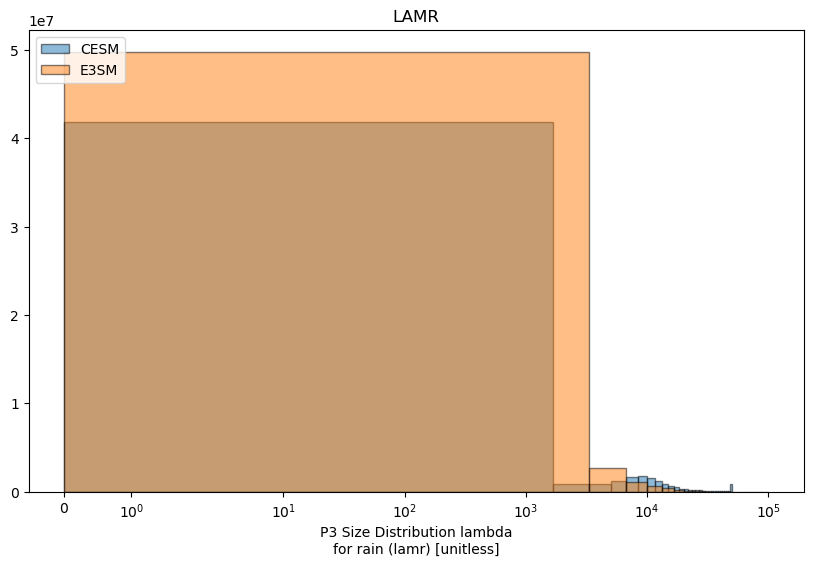

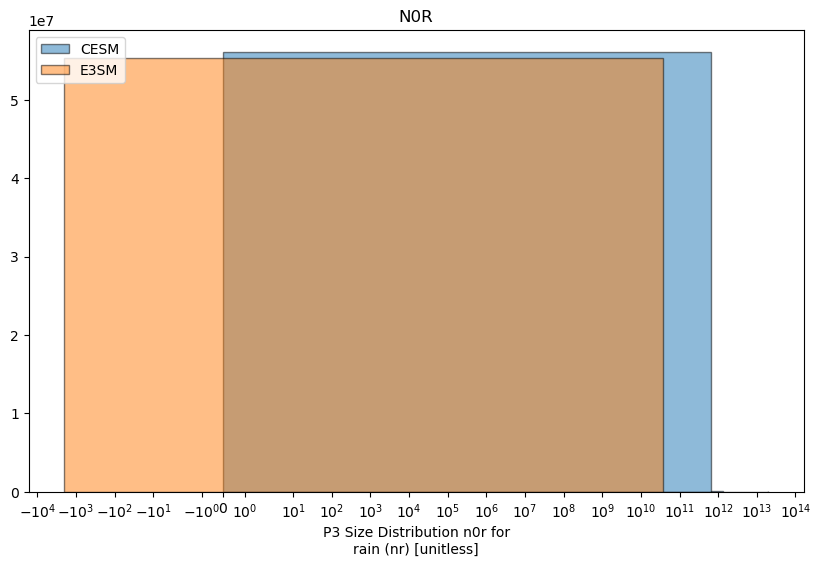

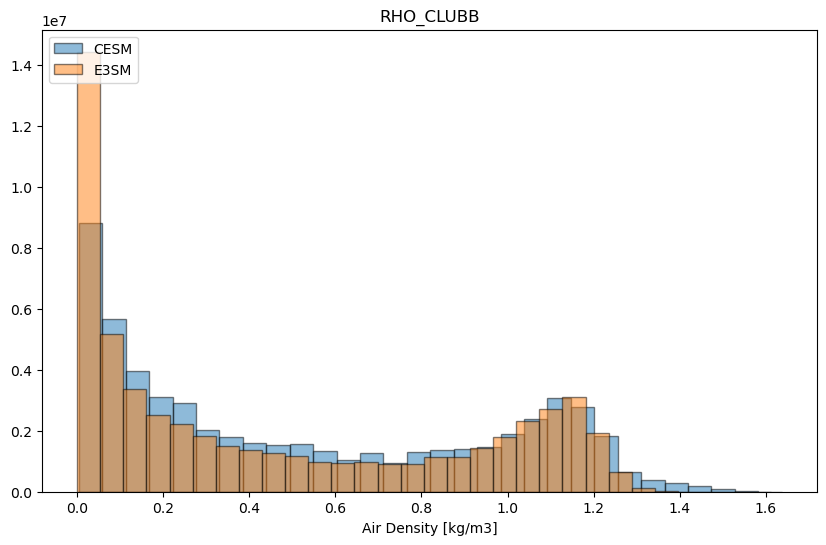

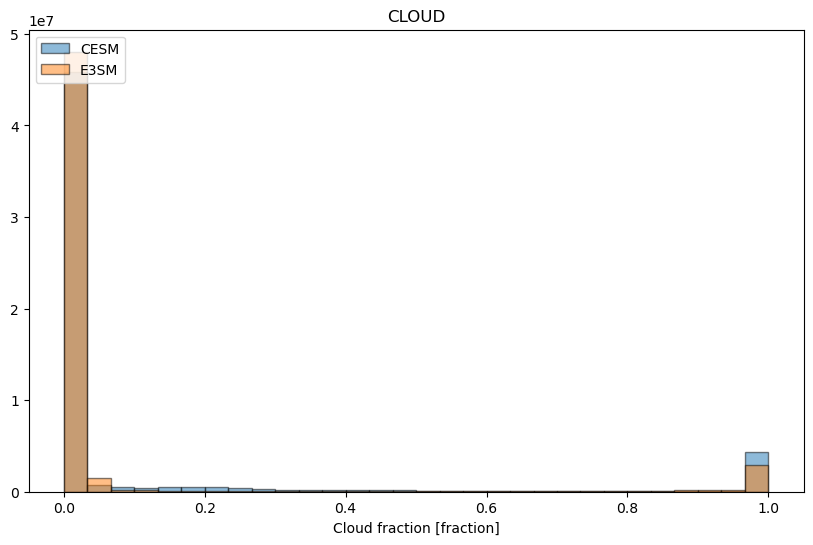

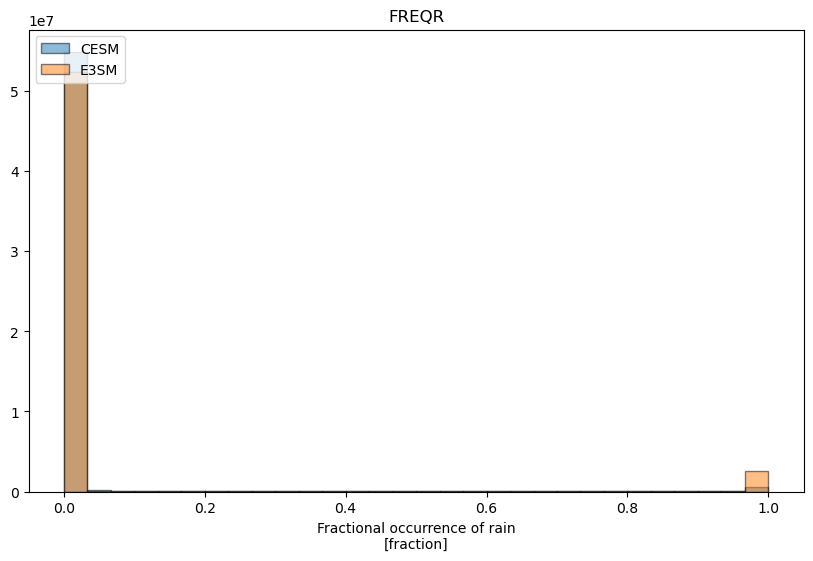

In [12]:
for i, j in enumerate(plot_variables):
    # Flatten the data into a single array
    # cesm_data = cesm_ds[j].values.flatten()
    # e3sm_data = e3sm_ds[e3sm_equivalent[i]].values.flatten()
    # Print length of data
    # print ("length of cesm ", j, " data = ", len(cesm_data))
    # print ("length of e3sm ", j, " data = ", len(e3sm_data))

    cesm_data = cesm_ds[j]
    e3sm_data = e3sm_ds[e3sm_equivalent[i]]

    loglist = ["QC_TAU_in", "QR_TAU_in", "NC_TAU_in", "NR_TAU_in", "LAMC", "LAMR", "N0R"]
    xscale = "linear"
    if j in loglist:
        # cesm_data = np.log10(cesm_data)
        # e3sm_data = np.log10(e3sm_data)
        xscale = "symlog"

    plt.figure(figsize=(10, 6))
    xr.plot.hist(cesm_data, bins=50, alpha=0.5, label="CESM", edgecolor='black', xscale=xscale);
    xr.plot.hist(e3sm_data, bins=50, alpha=0.5, label="E3SM", edgecolor='black', xscale=xscale);
    plt.legend(loc='upper left')
    plt.title(j)
    plt.show()

# Reading in filtered parquet data

In [ ]:
import dask.dataframe as dd

# Read multiple parquet files into a Dask DataFrame
ddf = dd.read_parquet("data/*.parquet", engine="pyarrow")  # Adjust path as needed

# Convert to Pandas (if necessary)
df = ddf.compute()

# Display the merged DataFrame
print(df.head())

In [ ]:
"/glade/derecho/scratch/wchuang/mlmicrophysics/cam_ml_tauREV4/"
"/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/"

In [13]:
pd.read_parquet("/glade/derecho/scratch/wchuang/mlmicrophysics/cam_ml_tauREV4/cam_mp_data_tauREV4_000000.parquet").dtypes

lev             float64
lat             float64
lon             float64
trop_cld_lev    float64
depth             int64
row               int64
col               int64
T               float64
RHO_CLUBB       float64
CLOUD           float64
FREQR           float64
QC_TAU_in       float64
NC_TAU_in       float64
QR_TAU_in       float64
NR_TAU_in       float64
QC_TAU_out      float64
NC_TAU_out      float64
QR_TAU_out      float64
NR_TAU_out      float64
qctend_TAU      float64
nctend_TAU      float64
qrtend_TAU      float64
nrtend_TAU      float64
PGAM            float64
LAMC            float64
LAMR            float64
N0R             float64
time            float64
dtype: object

In [277]:
pd.read_parquet("/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_008855.parquet", columns=["CLOUD"])

,CLOUD
0,0.999
1,0.999
2,0.999
3,0.999
4,0.999
...,...
10057765,0.999
10057766,0.999
10057767,0.999
10057768,0.999


In [273]:
import os

In [275]:
len(os.listdir("/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206"))

762

In [271]:
!ls -h "/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206"

e3sm_mp_data_tau1_000000.parquet  e3sm_mp_data_tau1_008763.parquet
e3sm_mp_data_tau1_000023.parquet  e3sm_mp_data_tau1_008786.parquet
e3sm_mp_data_tau1_000046.parquet  e3sm_mp_data_tau1_008809.parquet
e3sm_mp_data_tau1_000069.parquet  e3sm_mp_data_tau1_008832.parquet
e3sm_mp_data_tau1_000092.parquet  e3sm_mp_data_tau1_008855.parquet
e3sm_mp_data_tau1_000115.parquet  e3sm_mp_data_tau1_008878.parquet
e3sm_mp_data_tau1_000138.parquet  e3sm_mp_data_tau1_008901.parquet
e3sm_mp_data_tau1_000161.parquet  e3sm_mp_data_tau1_008924.parquet
e3sm_mp_data_tau1_000184.parquet  e3sm_mp_data_tau1_008947.parquet
e3sm_mp_data_tau1_000207.parquet  e3sm_mp_data_tau1_008970.parquet
e3sm_mp_data_tau1_000230.parquet  e3sm_mp_data_tau1_008993.parquet
e3sm_mp_data_tau1_000253.parquet  e3sm_mp_data_tau1_009016.parquet
e3sm_mp_data_tau1_000276.parquet  e3sm_mp_data_tau1_009039.parquet
e3sm_mp_data_tau1_000299.parquet  e3sm_mp_data_tau1_009062.parquet
e3sm_mp_data_tau1_000322.parquet  e3sm_mp_data_tau1_009085.par

In [5]:
import pandas as pd
import os 

base_path = "/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/"
file_names = os.listdir('/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/')
files = sorted([os.path.join(base_path, f) for f in file_names])

In [10]:
%%time
cloud = []
for f in files[:]:
    print(f)
    cloud.append(pd.read_parquet(f, columns=['qrtend_TAU']).astype("float32"))
all_cloud = pd.concat(cloud)

/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_004416.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_002967.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_013432.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_002323.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_004692.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_007567.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_004968.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_001564.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_011362.parquet
/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/20241206/e3sm_mp_data_tau1_01437

In [11]:
%%time
all_cloud.mean()

CPU times: user 10.9 s, sys: 14 s, total: 24.8 s
Wall time: 27.7 s


CLOUD    0.425801
dtype: float32

# Generate new pgam plot

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_e3sm = "/glade/work/wchuang/mlmicrophysics/data/e3sm_ml_tau"
file_names_e3sm = os.listdir(base_path_e3sm)
files_e3sm = sorted([os.path.join(base_path_e3sm, f) for f in file_names_e3sm])

base_path_cesm = "/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/"
file_names_cesm = os.listdir('/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/')
files_cesm = sorted([os.path.join(base_path_cesm, f) for f in file_names_cesm])

In [34]:
# Plotting E3SM data first
pgam_e3sm = []
for f in files_e3sm[:]:
    pgam_e3sm.append(pd.read_parquet(f, columns=["PGAM"]))
all_pgam_e3sm = pd.concat(pgam_e3sm)

In [13]:
all_pgam_e3sm.describe()

,PGAM
count,7.614260e+09
mean,1.131834e+01
std,1.643739e+00
min,2.000000e+00
25%,1.082223e+01
50%,1.163602e+01
75%,1.257616e+01
max,1.257627e+01


In [32]:
# Then plotting CESM data
pgam_cesm = []
for f in files_cesm[:]:
    print(f)
    pgam_cesm.append(pd.read_parquet(f, columns=["PGAM"]).astype("float32"))
all_pgam_cesm = pd.concat(pgam_cesm)

/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000000.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000023.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000046.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000069.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000092.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000115.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000138.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000161.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000184.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000207.parquet
/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/cam_mp_data_tauREV4_000230.parquet
/glade/wor

In [35]:
all_pgam_cesm.describe()

,PGAM
count,2.397948e+09
mean,7.310194e+00
std,3.188225e+00
min,2.000000e+00
25%,4.064920e+00
50%,9.216225e+00
75%,1.011111e+01
max,1.011111e+01


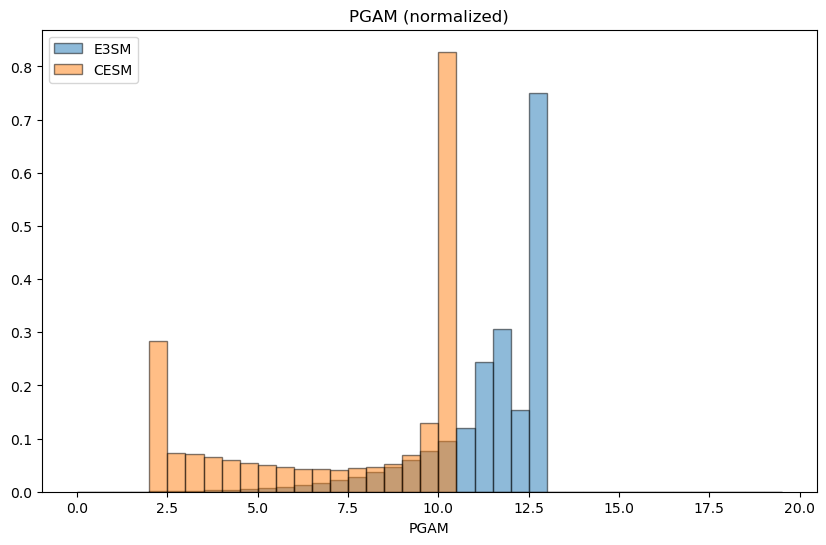

In [41]:
bins = [i/2 for i in range(0, 40, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(all_pgam_e3sm, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(all_pgam_cesm, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("PGAM (normalized)")
plt.xlabel("PGAM");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_PGAM_filtered.png")
plt.show();

In [42]:
del pgam_e3sm
del pgam_cesm

In [43]:
del all_pgam_e3sm
del all_pgam_cesm

# Generate new qrtend plot

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_e3sm = "/glade/work/wchuang/mlmicrophysics/data/e3sm_ml_tau"
file_names_e3sm = os.listdir(base_path_e3sm)
files_e3sm = sorted([os.path.join(base_path_e3sm, f) for f in file_names_e3sm])

base_path_cesm = "/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/"
file_names_cesm = os.listdir('/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/')
files_cesm = sorted([os.path.join(base_path_cesm, f) for f in file_names_cesm])

In [2]:
# Plotting E3SM data first
qrtend_e3sm = []
for f in files_e3sm[:]:
    qrtend_e3sm.append(pd.read_parquet(f, columns=["qrtend_TAU"]))
all_qrtend_e3sm = pd.concat(qrtend_e3sm)

In [45]:
all_qrtend_e3sm.describe()

,qrtend_TAU
count,7.614260e+09
mean,5.046590e-07
std,2.487903e-06
min,0.000000e+00
25%,4.253229e-12
50%,1.448873e-09
75%,5.244573e-08
max,1.700000e-05


In [46]:
del qrtend_e3sm

In [3]:
# Then plotting CESM data
qrtend_cesm = []
for f in files_cesm[:]:
    qrtend_cesm.append(pd.read_parquet(f, columns=["qrtend_TAU"]).astype("float32"))
all_qrtend_cesm = pd.concat(qrtend_cesm)

In [48]:
all_qrtend_cesm.describe()

,qrtend_TAU
count,2.397948e+09
mean,2.408729e-07
std,8.529640e-07
min,0.000000e+00
25%,5.167721e-11
50%,4.786924e-09
75%,8.448781e-08
max,8.333333e-06


In [10]:
cesm_df = np.log10(all_qrtend_cesm)
# cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_df = np.log10(all_qrtend_e3sm)
# e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [11]:
cesm_df.dropna(inplace=True)

In [8]:
e3sm_df.dropna(inplace=True)

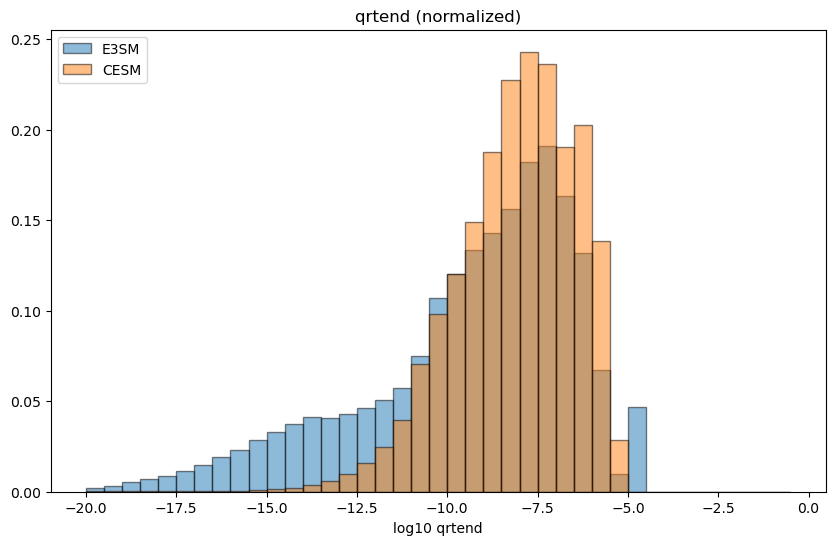

In [14]:
bins = [i/2 for i in range(-40, 0, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("qrtend (normalized)")
plt.xlabel("log10 qrtend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_qrtend_filtered.png")
plt.show();

# Generate new nrtend plot

In [1]:
%%time
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_e3sm = "/glade/work/wchuang/mlmicrophysics/data/e3sm_ml_tau"
file_names_e3sm = os.listdir(base_path_e3sm)
files_e3sm = sorted([os.path.join(base_path_e3sm, f) for f in file_names_e3sm])

base_path_cesm = "/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/"
file_names_cesm = os.listdir('/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/')
files_cesm = sorted([os.path.join(base_path_cesm, f) for f in file_names_cesm])

CPU times: user 691 ms, sys: 199 ms, total: 889 ms
Wall time: 6.65 s


In [2]:
%%time
# Plotting E3SM data first
nrtend_e3sm = []
for f in files_e3sm[:]:
    nrtend_e3sm.append(pd.read_parquet(f, columns=["nrtend_TAU"]))
all_nrtend_e3sm = pd.concat(nrtend_e3sm)

CPU times: user 26.1 s, sys: 16.2 s, total: 42.3 s
Wall time: 1min 36s


In [3]:
all_nrtend_e3sm.describe()

,nrtend_TAU
count,7.614260e+09
mean,-9.269503e-01
std,2.199691e+02
min,-6.864228e+05
25%,-5.200516e-03
50%,-1.975894e-05
75%,-5.211467e-08
max,9.642137e+03


In [3]:
%%time
del nrtend_e3sm

CPU times: user 5.89 ms, sys: 146 ms, total: 152 ms
Wall time: 154 ms


In [4]:
%%time
# Then plotting CESM data
nrtend_cesm = []
for f in files_cesm[:]:
    nrtend_cesm.append(pd.read_parquet(f, columns=["nrtend_TAU"]).astype("float32"))
all_nrtend_cesm = pd.concat(nrtend_cesm)

CPU times: user 9.11 s, sys: 10.6 s, total: 19.8 s
Wall time: 59.2 s


In [14]:
all_nrtend_cesm.describe()

,nrtend_TAU
count,2.397948e+09
mean,inf
std,NaN
min,-6.631456e+05
25%,-3.373482e+00
50%,-1.446049e-03
75%,1.327733e+01
max,inf


In [15]:
cesm_neg_df = np.log10(-all_nrtend_cesm)
# cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_neg_df = np.log10(-all_nrtend_e3sm)
# e3sm_df = e3sm_df.where(e3sm_df != -np.inf)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [16]:
cesm_neg_df.dropna(inplace=True)
e3sm_neg_df.dropna(inplace=True)

In [5]:
%%time
cesm_pos_df = np.log10(all_nrtend_cesm)
e3sm_pos_df = np.log10(all_nrtend_e3sm)
cesm_pos_df.dropna(inplace=True)
e3sm_pos_df.dropna(inplace=True)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


CPU times: user 48.3 s, sys: 8.79 s, total: 57.1 s
Wall time: 1min 1s


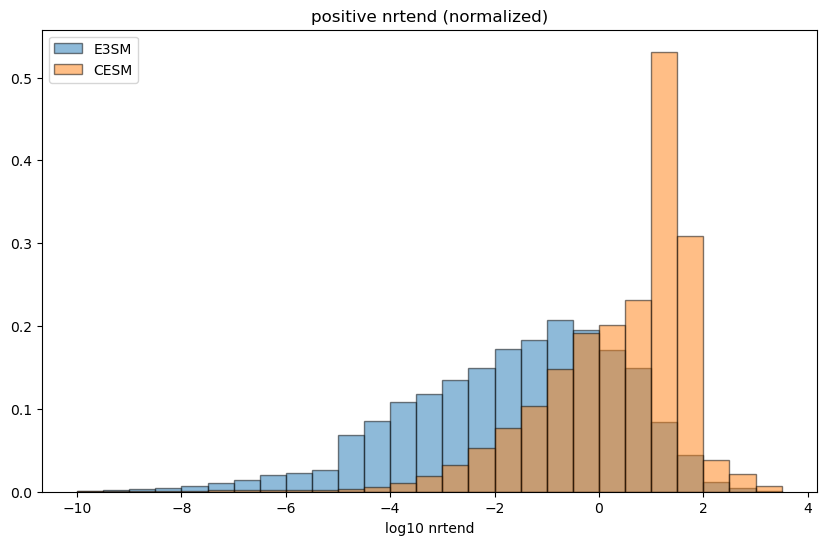

In [11]:
bins = [i/2 for i in range(-20, 8, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_pos_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_pos_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("positive nrtend (normalized)")
plt.xlabel("log10 nrtend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_pos_nrtend_filtered.png")
plt.show();

In [15]:
%%time
e3sm_pos_df.describe()

CPU times: user 11.7 s, sys: 1.91 s, total: 13.6 s
Wall time: 14.7 s


,nrtend_TAU
count,1.224305e+09
mean,-inf
std,NaN
min,-inf
25%,-3.288601e+00
50%,-1.501491e+00
75%,-1.592534e-01
max,3.984174e+00


In [16]:
%%time
cesm_pos_df.describe()

CPU times: user 20.7 s, sys: 1.36 s, total: 22.1 s
Wall time: 23.9 s


,nrtend_TAU
count,9.569993e+08
mean,NaN
std,NaN
min,-inf
25%,2.962611e-01
50%,1.477372e+00
75%,7.264492e+00
max,inf


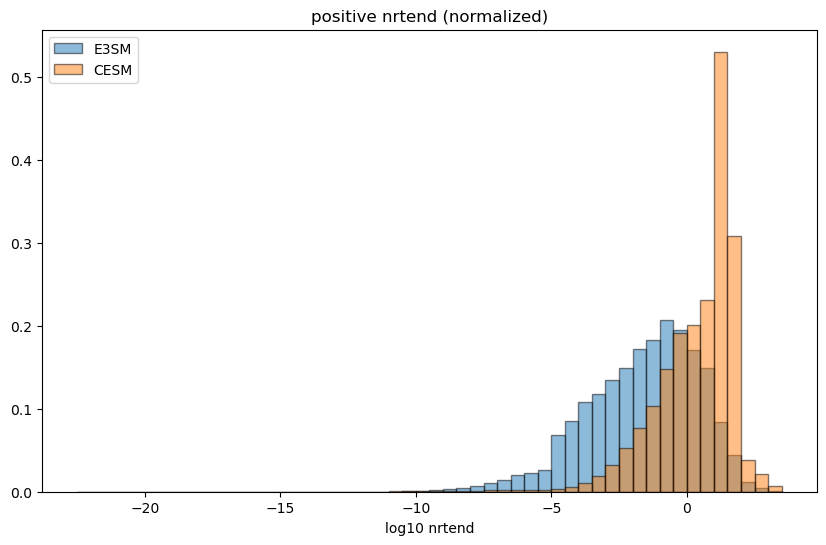

CPU times: user 1min 25s, sys: 0 ns, total: 1min 25s
Wall time: 1min 29s


In [7]:
%%time
bins = [i/2 for i in range(-45, 8, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_pos_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_pos_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("positive nrtend (normalized)")
plt.xlabel("log10 nrtend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_pos_nrtend_filtered_2.png")
plt.show();

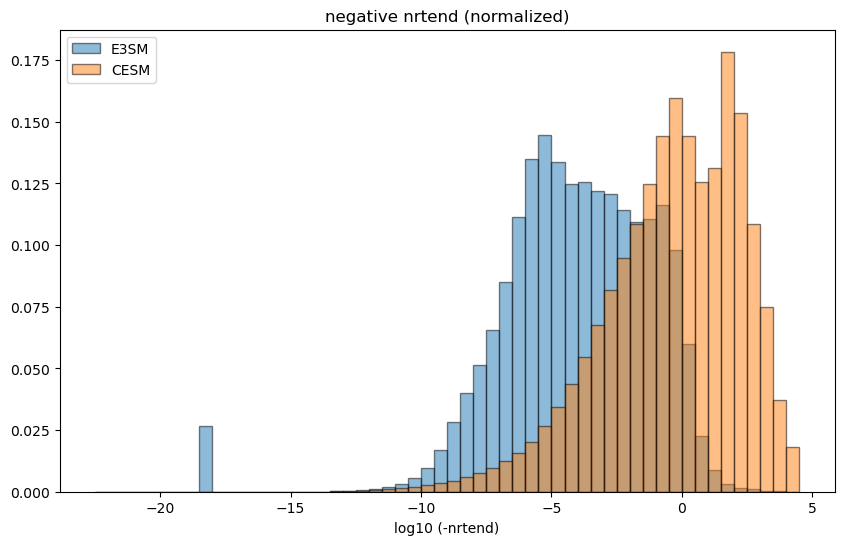

In [17]:
bins = [i/2 for i in range(-45, 10, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_neg_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("negative nrtend (normalized)")
plt.xlabel("log10 (-nrtend)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_nrtend_neg_filtered.png")
plt.show();

### Investigating why nrtend has a small negative peak at -1e-17

In [2]:
%%time
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr

file_path = '/glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000_filter01.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
e3sm_ds = xr.open_dataset(file_path)

CPU times: user 17.3 ms, sys: 916 µs, total: 18.2 ms
Wall time: 18.2 ms


In [3]:
%%time
e3sm_ds_nrtendFilter = e3sm_ds.where((e3sm_ds.P3_nrtend_TAU_raw > -1e-15) & (e3sm_ds.P3_nrtend_TAU_raw < -1e-20))

CPU times: user 5.67 s, sys: 2.27 s, total: 7.94 s
Wall time: 8.48 s


In [4]:
e3sm_ds_nrtendFilter

<xarray.Dataset>
Dimensions:            (time: 32, lev: 80, ncol: 21600, ilev: 81)
Coordinates:
  * lev                (lev) float64 0.1236 0.1819 0.2674 ... 986.2 993.8 998.5
  * ilev               (ilev) float64 0.1 0.1472 0.2166 ... 990.5 997.0 1e+03
  * time               (time) object 2001-07-04 00:00:00 ... 2001-08-02 17:00:00
Dimensions without coordinates: ncol
Data variables: (12/20)
    T                  (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    RHO_CLUBB          (time, ilev, ncol, lev) float32 nan nan nan ... nan nan
    CLOUD              (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    FREQR              (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_qc_in_TAU       (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_nc_in_TAU       (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    ...                 ...
    P3_qrtend_TAU_raw  (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_nrtend_TAU_raw  (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_mu_c            (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_lamc            (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_lamr            (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
    P3_nr              (time, lev, ncol) float32 nan nan nan nan ... nan nan nan
Attributes: (12/19)
    ne:                30
    fv_nphys:          2
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         a67353c6a2
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@llnl.gov
    initial_file:      /global/cfs/cdirs/e3sm/inputdata/atm/cam/inic/homme/ea...
    topography_file:   /global/cfs/cdirs/e3sm/inputdata/atm/cam/topo/USGS-gto...
    time_period_freq:  hour_23

In [5]:
e3sm_ds_nrtendFilter.P3_nrtend_TAU_raw

<xarray.DataArray 'P3_nrtend_TAU_raw' (time: 32, lev: 80, ncol: 21600)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lev      (lev) float64 0.1236 0.1819 0.2674 0.3924 ... 986.2 993.8 998.5
  * time     (time) object 2001-07-04 00:00:00 ... 2001-08-02 17:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         #/kg/s
    long_name:     P3 TAU Stochastic collection raw in-cloud nr tendency
    cell_methods:  time: point

In [6]:
e3sm_ds

<xarray.Dataset>
Dimensions:            (time: 32, lev: 80, ncol: 21600, ilev: 81)
Coordinates:
  * lev                (lev) float64 0.1236 0.1819 0.2674 ... 986.2 993.8 998.5
  * ilev               (ilev) float64 0.1 0.1472 0.2166 ... 990.5 997.0 1e+03
  * time               (time) object 2001-07-04 00:00:00 ... 2001-08-02 17:00:00
Dimensions without coordinates: ncol
Data variables: (12/20)
    T                  (time, lev, ncol) float32 ...
    RHO_CLUBB          (time, ilev, ncol) float32 ...
    CLOUD              (time, lev, ncol) float32 ...
    FREQR              (time, lev, ncol) float32 ...
    P3_qc_in_TAU       (time, lev, ncol) float32 ...
    P3_nc_in_TAU       (time, lev, ncol) float32 ...
    ...                 ...
    P3_qrtend_TAU_raw  (time, lev, ncol) float32 ...
    P3_nrtend_TAU_raw  (time, lev, ncol) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    P3_mu_c            (time, lev, ncol) float32 ...
    P3_lamc            (time, lev, ncol) float32 ...
    P3_lamr            (time, lev, ncol) float32 ...
    P3_nr              (time, lev, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    fv_nphys:          2
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         a67353c6a2
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@llnl.gov
    initial_file:      /global/cfs/cdirs/e3sm/inputdata/atm/cam/inic/homme/ea...
    topography_file:   /global/cfs/cdirs/e3sm/inputdata/atm/cam/topo/USGS-gto...
    time_period_freq:  hour_23

In [7]:
e3sm_ds_nrtendFilter_count = e3sm_ds_nrtendFilter.P3_nrtend_TAU_raw.count(dim=["time", "ncol"])

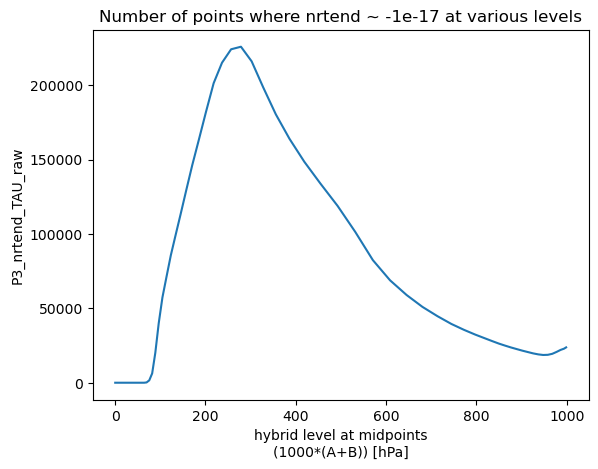

In [8]:
e3sm_ds_nrtendFilter_count.plot()
plt.title("Number of points where nrtend ~ -1e-17 at various levels - July")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_nrtend_filtered_-1e-17_jul.png")

In [9]:
%%time
e3sm_ds_nrtendFilter2 = e3sm_ds.where((e3sm_ds.P3_nrtend_TAU_raw > -1e-15) & (e3sm_ds.P3_nrtend_TAU_raw < -1e-20) & (e3sm_ds.CLOUD > 1e-2) & (e3sm_ds.P3_qc_in_TAU > 1e-6) & (e3sm_ds.P3_qctend_TAU_raw < 0))

CPU times: user 4.15 s, sys: 2.21 s, total: 6.36 s
Wall time: 7.47 s


In [10]:
e3sm_ds_nrtendFilter_count2 = e3sm_ds_nrtendFilter2.P3_nrtend_TAU_raw.count(dim=["time", "ncol"])

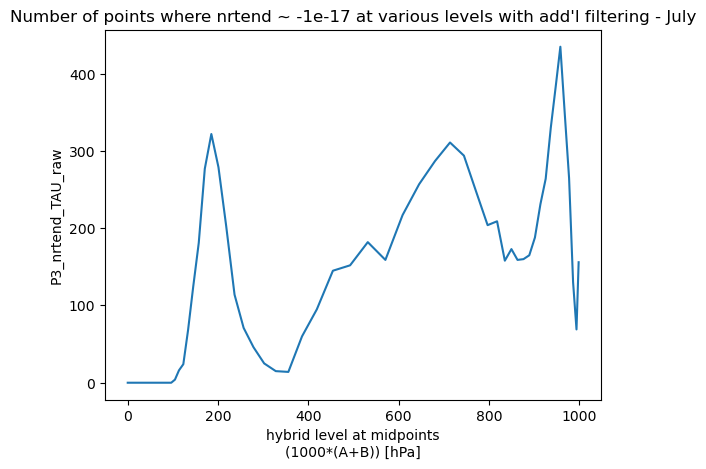

In [14]:
e3sm_ds_nrtendFilter_count2.plot()
plt.title("Number of points where nrtend ~ -1e-17 at various levels with add'l filtering - July")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_nrtend_strong_filtered_-1e-17_jul.png")

In [44]:
!ls /glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/

e3sm300_mlmicro11.1_tau_train.eam.h1.2001-01-01-00000.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-01-31-57600.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-03-03-28800.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-04-03-00000.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-05-03-57600.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-06-03-28800.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000_filter01.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-08-03-57600.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-09-03-28800.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-10-04-00000.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-11-03-57600.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2001-12-04-28800.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2002-01-04-00000.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2002-02-03-57600.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2002-03-06-28800.nc
e3sm300_mlmicro11.1_tau_train.eam.h1.2002-04-06-00000.nc
e3sm300_mlmicro11.1_ta

In [ ]:
%%time
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr

file_path = '/glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/e3sm300_mlmicro11.1_tau_train.eam.h1.2001-12-04-28800.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
e3sm_ds = xr.open_dataset(file_path)
e3sm_ds_nrtendFilter3 = e3sm_ds.where((e3sm_ds.P3_nrtend_TAU_raw > -1e-15) & (e3sm_ds.P3_nrtend_TAU_raw < -1e-20) & (e3sm_ds.CLOUD > 1e-2) & (e3sm_ds.P3_qc_in_TAU > 1e-6) & (e3sm_ds.P3_qctend_TAU_raw < 0))
e3sm_ds_nrtendFilter3_count = e3sm_ds_nrtendFilter3.P3_nrtend_TAU_raw.count(dim=["time", "ncol"])

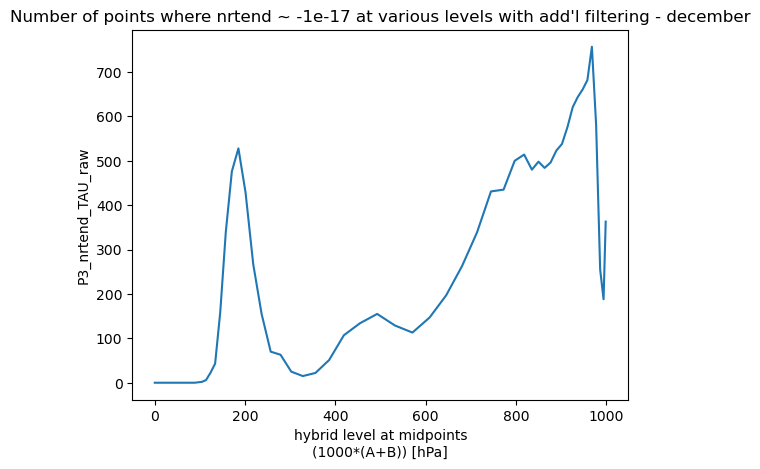

In [15]:
e3sm_ds_nrtendFilter3_count.plot()
plt.title("Number of points where nrtend ~ -1e-17 at various levels with add'l filtering - december")
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_nrtend_strong_filtered_-1e-17_dec.png");

# Generate new nctend plot

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_e3sm = "/glade/work/wchuang/mlmicrophysics/data/e3sm_ml_tau"
file_names_e3sm = os.listdir(base_path_e3sm)
files_e3sm = sorted([os.path.join(base_path_e3sm, f) for f in file_names_e3sm])

base_path_cesm = "/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/"
file_names_cesm = os.listdir('/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/')
files_cesm = sorted([os.path.join(base_path_cesm, f) for f in file_names_cesm])

In [2]:
# Plotting E3SM data first
nctend_e3sm = []
for f in files_e3sm[:]:
    nctend_e3sm.append(pd.read_parquet(f, columns=["nctend_TAU"]))
all_nctend_e3sm = pd.concat(nctend_e3sm)

In [3]:
all_nctend_e3sm.describe()

,nctend_TAU
count,7.614260e+09
mean,-4.935994e+04
std,1.038954e+05
min,-4.444982e+07
25%,-4.842733e+04
50%,-8.581001e+03
75%,-4.766878e+02
max,0.000000e+00


In [4]:
del nctend_e3sm

In [5]:
# Then plotting CESM data
nctend_cesm = []
for f in files_cesm[:]:
    nctend_cesm.append(pd.read_parquet(f, columns=["nctend_TAU"]).astype("float32"))
all_nctend_cesm = pd.concat(nctend_cesm)

In [20]:
all_nctend_cesm.describe()

,nctend_TAU
count,2.397948e+09
mean,-1.147348e+04
std,3.104479e+04
min,-4.814800e+06
25%,-9.779315e+03
50%,-6.696133e+02
75%,-1.636187e+01
max,0.000000e+00


In [6]:
cesm_neg_df = np.log10(-all_nctend_cesm)
# cesm_df = cesm_df.where(cesm_df != -np.inf)
e3sm_neg_df = np.log10(-all_nctend_e3sm)
# e3sm_df = e3sm_df.where(e3sm_df != -np.inf)
# cesm_pos_df = np.log10(all_nctend_cesm)
# e3sm_pos_df = np.log10(all_nctend_e3sm)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [25]:
# cesm_pos_df.dropna(inplace=True)

In [40]:
# cesm_pos_df = np.log10(all_nctend_cesm)
# cesm_pos_na_df = cesm_pos_df.where(cesm_pos_df != -np.inf).dropna(inplace=True)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
# cesm_pos_df.dropna().where(cesm_pos_df != -np.inf)

In [7]:
cesm_neg_df.dropna(inplace=True)
e3sm_neg_df.dropna(inplace=True)

In [23]:
# cesm_pos_df.dropna(inplace=True)
# e3sm_pos_df.dropna(inplace=True)

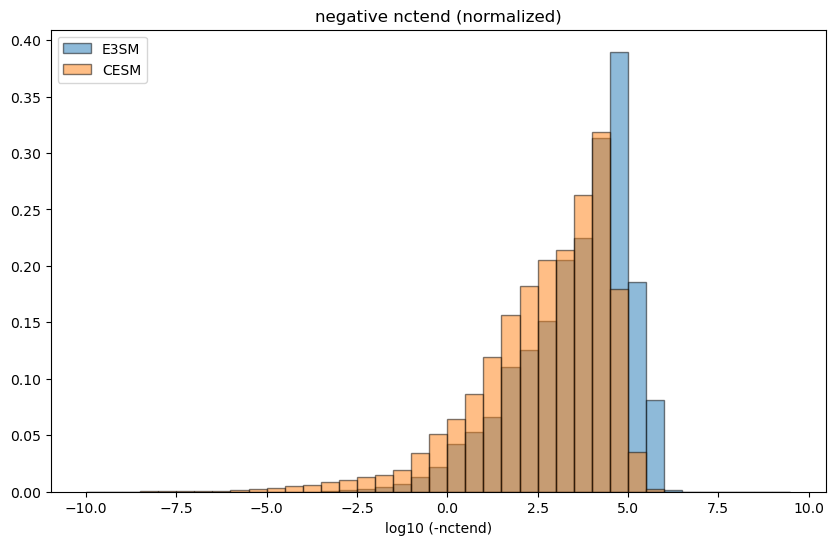

In [9]:
bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_neg_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("negative nctend (normalized)")
plt.xlabel("log10 (-nctend)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_nctend_neg_filtered.png")
plt.show();

# Generate new Qcplot

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

base_path_e3sm = "/glade/work/wchuang/mlmicrophysics/data/e3sm_ml_tau"
file_names_e3sm = os.listdir(base_path_e3sm)
files_e3sm = sorted([os.path.join(base_path_e3sm, f) for f in file_names_e3sm])

base_path_cesm = "/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/"
file_names_cesm = os.listdir('/glade/work/wchuang/mlmicrophysics/data/cam_ml_tauREV4/')
files_cesm = sorted([os.path.join(base_path_cesm, f) for f in file_names_cesm])

In [2]:
# Plotting E3SM data first
qc_in_e3sm = []
for f in files_e3sm[:]:
    qc_in_e3sm.append(pd.read_parquet(f, columns=["QC_TAU_in"]))
all_qc_in_e3sm = pd.concat(qc_in_e3sm)

In [3]:
all_qc_in_e3sm.describe()

,QC_TAU_in
count,7.614260e+09
mean,2.471631e-04
std,7.934535e-04
min,1.000001e-08
25%,9.572342e-06
50%,5.363356e-05
75%,1.836052e-04
max,5.100000e-03


In [4]:
del qc_in_e3sm

In [5]:
# Then plotting CESM data
qc_in_cesm = []
for f in files_cesm[:]:
    qc_in_cesm.append(pd.read_parquet(f, columns=["QC_TAU_in"]).astype("float32"))
all_qc_in_cesm = pd.concat(qc_in_cesm)

In [6]:
all_qc_in_cesm.describe()

,QC_TAU_in
count,2.397948e+09
mean,1.899438e-04
std,5.115511e-04
min,1.000000e-08
25%,3.599361e-06
50%,4.954267e-05
75%,1.604237e-04
max,5.000000e-03


In [6]:
# cesm_neg_df = np.log10(-all_nctend_cesm)
# cesm_df = cesm_df.where(cesm_df != -np.inf)
# e3sm_neg_df = np.log10(-all_nctend_e3sm)
# e3sm_df = e3sm_df.where(e3sm_df != -np.inf)
# cesm_pos_df = np.log10(all_nctend_cesm)
# e3sm_pos_df = np.log10(all_nctend_e3sm)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [25]:
# cesm_pos_df.dropna(inplace=True)

In [40]:
# cesm_pos_df = np.log10(all_nctend_cesm)
# cesm_pos_na_df = cesm_pos_df.where(cesm_pos_df != -np.inf).dropna(inplace=True)

/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/glade/u/home/wchuang/.local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
# cesm_pos_df.dropna().where(cesm_pos_df != -np.inf)

In [7]:
# cesm_neg_df.dropna(inplace=True)
# e3sm_neg_df.dropna(inplace=True)

In [23]:
# cesm_pos_df.dropna(inplace=True)
# e3sm_pos_df.dropna(inplace=True)

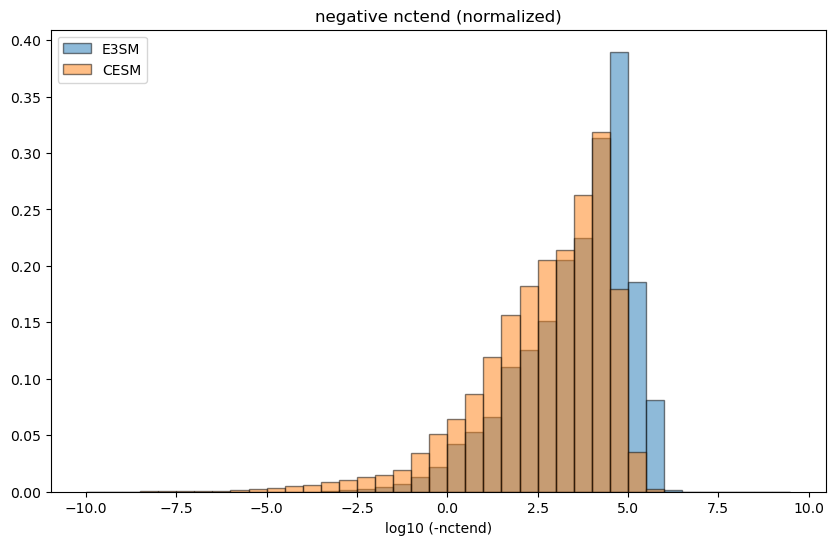

In [9]:
bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(cesm_neg_df, bins=bins, alpha=0.5, label="CESM", edgecolor='black', density=density);
plt.legend(loc='upper left')
plt.title("negative nctend (normalized)")
plt.xlabel("log10 (-nctend)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/comparison_cesm_e3sm_nctend_neg_filtered.png")
plt.show();

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr

In [2]:
file = pd.read_parquet("/glade/derecho/scratch/wchuang/mlmicrophysics/e3sm_ml_tau1/test/e3sm_mp_data_tau1_000000.parquet")

In [5]:
file["nrtend_TAU"]

0          0.477166
1          0.477166
2          0.477166
3          0.477166
4          0.477166
             ...   
4980361   -1.089393
4980362   -1.089393
4980363   -1.089393
4980364   -1.089393
4980365   -1.089393
Name: nrtend_TAU, Length: 4980366, dtype: float32

### Examining e3sm training data filtered for abs(nrtend) > 1e-10

In [92]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr

In [93]:
input = pd.read_parquet("/glade/derecho/scratch/wchuang/mlmicrophysics/tau_e3sm_run1/20250225/mp_input_filtered_train.parquet")
output = pd.read_parquet("/glade/derecho/scratch/wchuang/mlmicrophysics/tau_e3sm_run1/20250225/mp_output_train.parquet")

In [10]:
input.describe()

,QC_TAU_in,QR_TAU_in,NC_TAU_in,NR_TAU_in,PGAM,LAMC,LAMR,N0R,RHO_CLUBB,CLOUD,FREQR
count,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07,1.484396e+07
mean,2.550789e-04,6.825040e-06,4.158641e+07,5.072340e+02,1.074100e+01,7.602893e+05,8.538588e+03,1.123249e+07,4.648347e-01,5.986895e-01,2.786427e-01
std,7.989231e-04,8.934420e-05,4.834439e+07,4.133595e+04,1.727006e+00,3.798447e+05,1.031158e+04,9.474989e+08,4.521776e-01,4.024081e-01,4.456778e-01
min,1.000000e-06,0.000000e+00,2.422549e+04,0.000000e+00,2.000000e+00,1.454441e+05,0.000000e+00,5.394361e-08,1.541629e-04,1.000000e-02,0.000000e+00
25%,2.049491e-05,1.039007e-10,1.688876e+07,1.074074e-03,1.003499e+01,4.732771e+05,2.082607e+03,3.716069e+00,5.123507e-02,1.251086e-01,0.000000e+00
50%,6.884155e-05,8.044504e-09,2.502417e+07,2.613404e-01,1.137324e+01,6.888119e+05,5.949097e+03,1.569214e+03,2.737916e-01,7.484261e-01,0.000000e+00
75%,1.825041e-04,4.365721e-07,5.247010e+07,4.431191e+01,1.166099e+01,9.497918e+05,1.158398e+04,3.216085e+05,9.485106e-01,9.990000e-01,9.980308e-01
max,5.100000e-03,1.000000e-02,8.331842e+09,7.029039e+07,1.257627e+01,4.214047e+06,1.000000e+05,1.972020e+12,1.547904e+00,1.000000e+00,1.000000e+00


14843963

QC_TAU_in

In [114]:
eps = np.finfo(np.float64).eps

In [115]:
qc_tau_in_log_eps = np.log10(input["QC_TAU_in"]) 

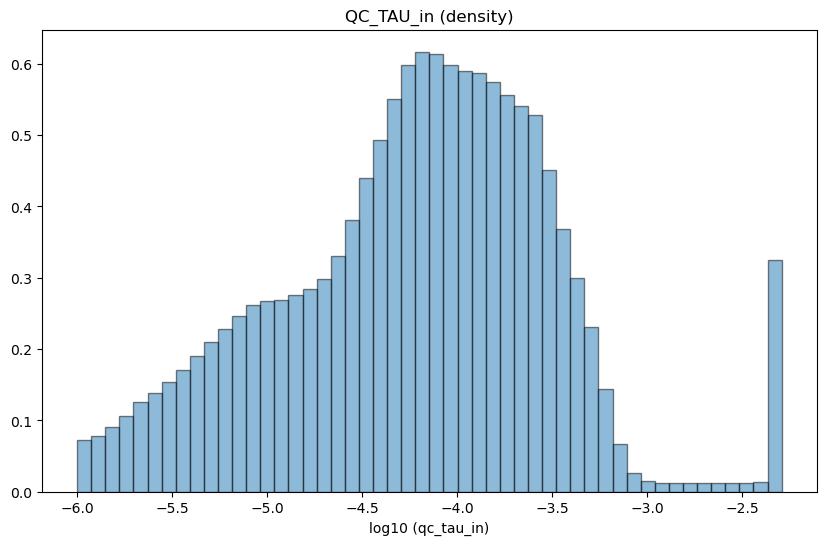

In [116]:
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(qc_tau_in_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("QC_TAU_in (density)")
plt.xlabel("log10 (qc_tau_in)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_QCin.png")
plt.show();

QR_TAU_in

In [117]:
eps = np.finfo(np.float64).eps
qr_tau_in_log_eps = np.log10(input["QR_TAU_in"] + eps)

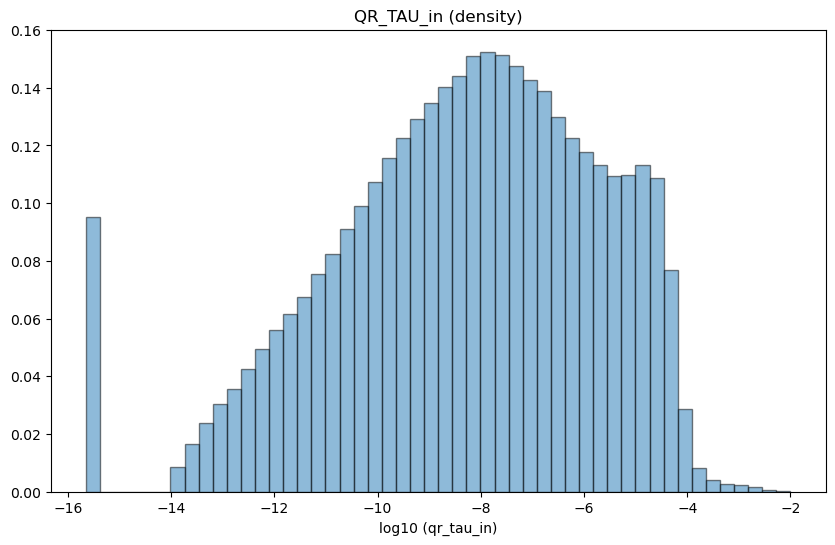

In [118]:
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(qr_tau_in_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("QR_TAU_in (density)")
plt.xlabel("log10 (qr_tau_in)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_QRin.png")
plt.show();

NC_TAU_in

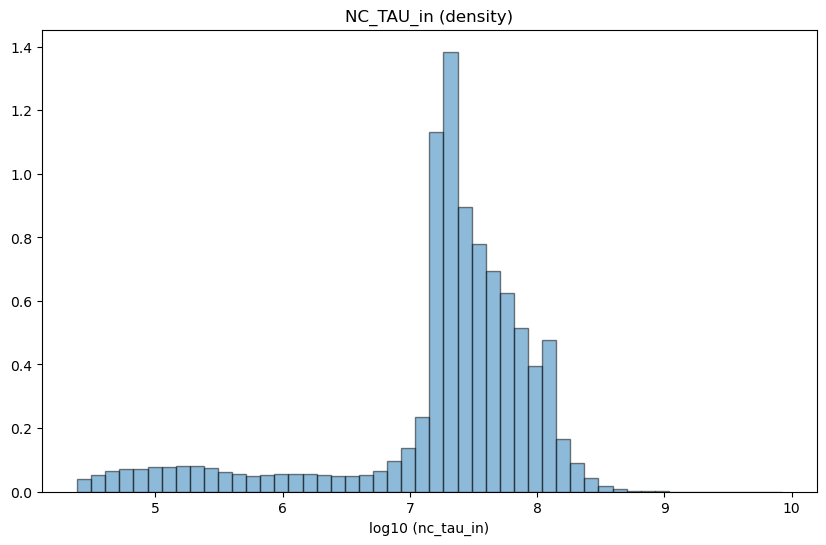

In [119]:
eps = np.finfo(np.float64).eps
nc_tau_in_log_eps = np.log10(input["NC_TAU_in"] + eps)

# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(nc_tau_in_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("NC_TAU_in (density)")
plt.xlabel("log10 (nc_tau_in)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_NCin.png")
plt.show();

NR_TAU_in

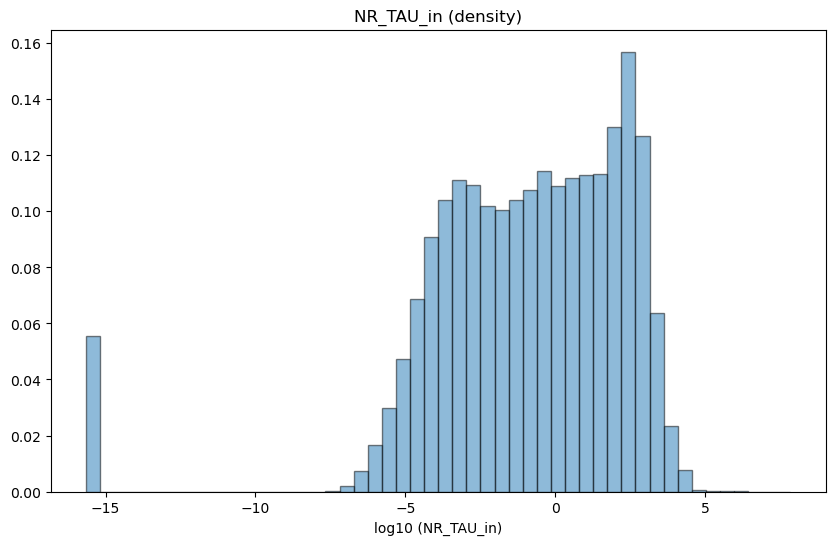

In [120]:
eps = np.finfo(np.float64).eps
NR_TAU_in_log_eps = np.log10(input["NR_TAU_in"] + eps)

# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(NR_TAU_in_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("NR_TAU_in (density)")
plt.xlabel("log10 (NR_TAU_in)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_NRin.png")
plt.show();

PGAM

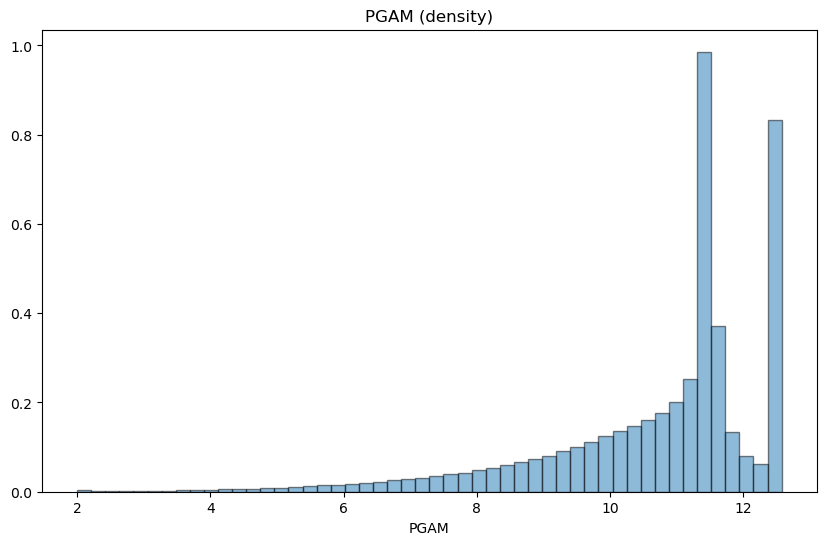

In [121]:
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(input["PGAM"], bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("PGAM (density)")
plt.xlabel("PGAM");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_PGAM.png")
plt.show();

LAMC

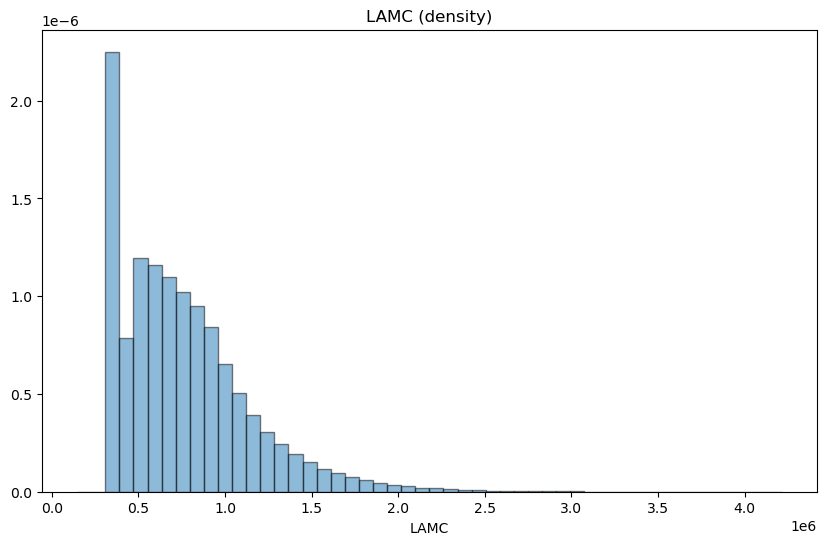

In [122]:
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(input["LAMC"], bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("LAMC (density)")
plt.xlabel("LAMC");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_LAMC.png")
plt.show();

LAMR

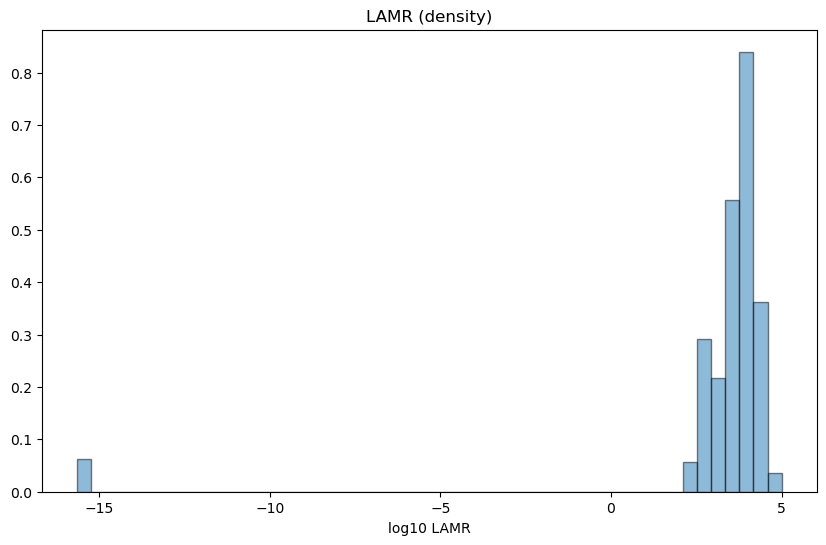

In [123]:
eps = np.finfo(np.float64).eps
LAMR_log_eps = np.log10(input["LAMR"] + eps)
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(LAMR_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("LAMR (density)")
plt.xlabel("log10 LAMR");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_LAMR.png")
plt.show();

N0R

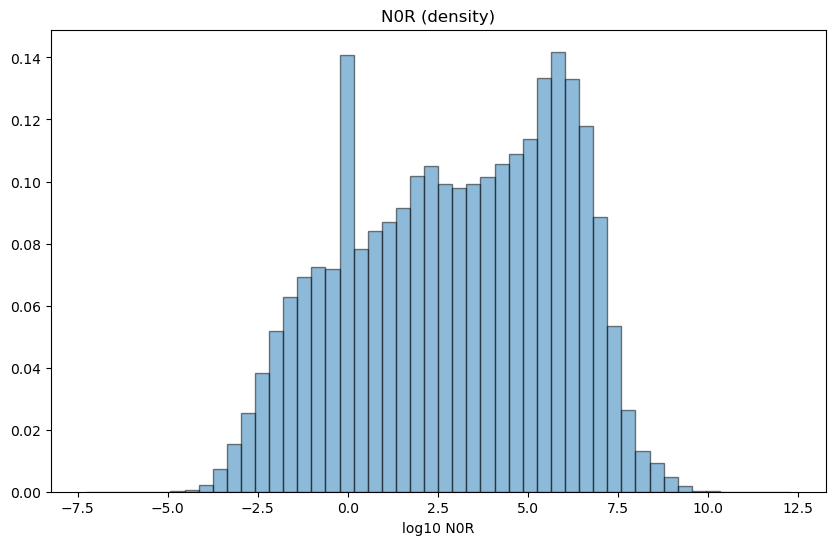

In [124]:
eps = np.finfo(np.float64).eps
N0R_log_eps = np.log10(input["N0R"] + eps)
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(N0R_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("N0R (density)")
plt.xlabel("log10 N0R");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_N0R.png")
plt.show();

RHO_CLUBB

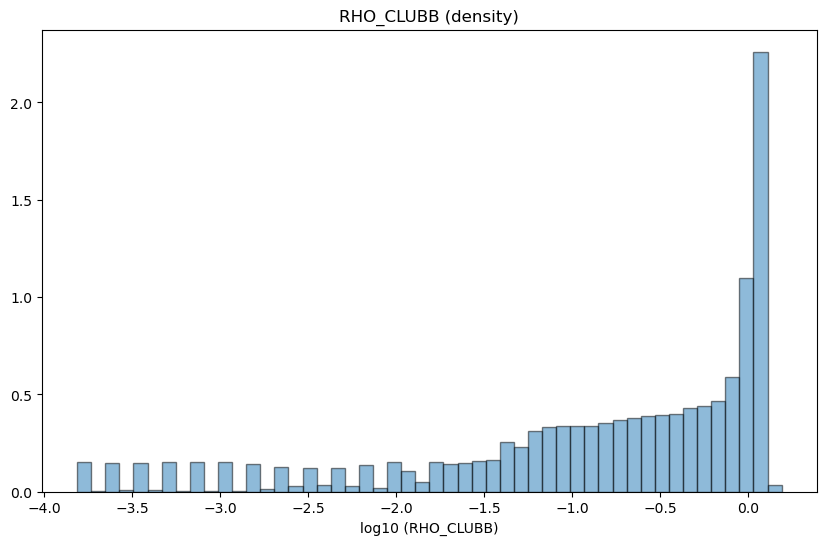

In [125]:
eps = np.finfo(np.float64).eps
RHO_CLUBB_log_eps = np.log10(input["RHO_CLUBB"] + eps)
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(RHO_CLUBB_log_eps, bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("RHO_CLUBB (density)")
plt.xlabel("log10 (RHO_CLUBB)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_RHOCLUBB.png")
plt.show();

CLOUD

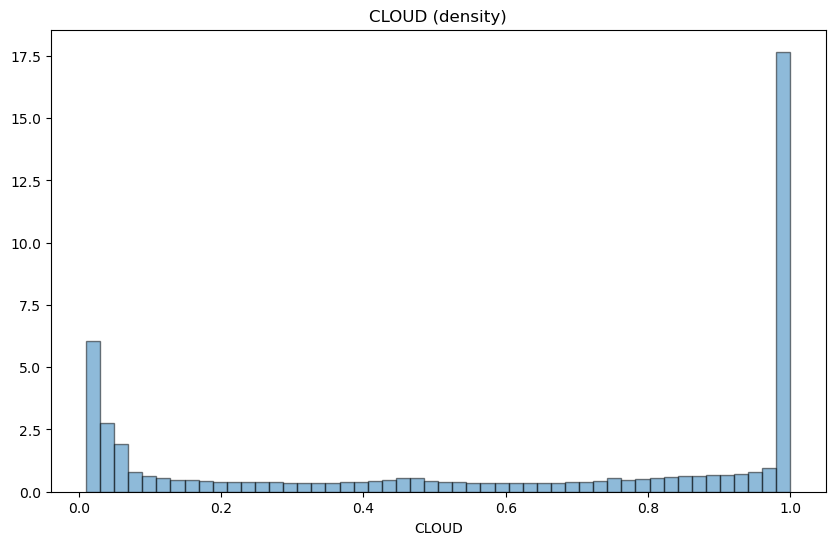

In [126]:
eps = np.finfo(np.float64).eps
CLOUD_log_eps = np.log10(input["CLOUD"] + eps)
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(input["CLOUD"], bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("CLOUD (density)")
plt.xlabel("CLOUD");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_CLOUD.png")
plt.show();

FREQR

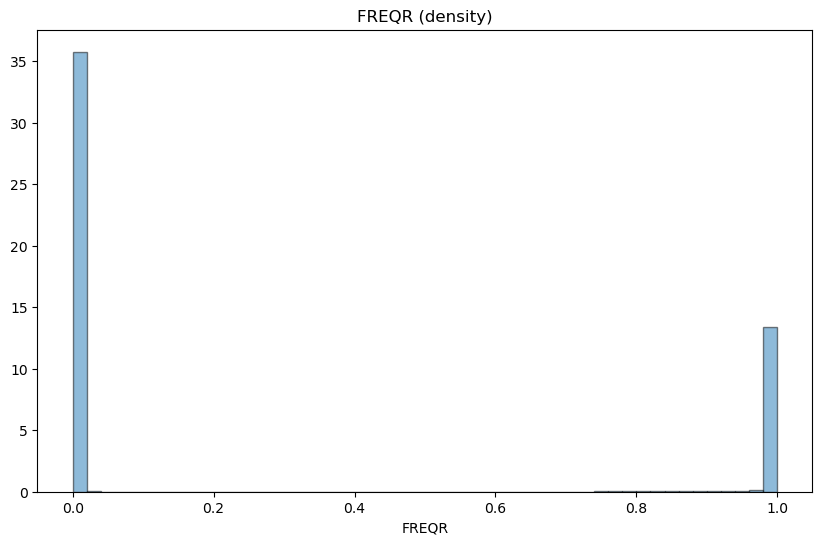

In [142]:
eps = np.finfo(np.float64).eps
FREQR_log_eps = np.log10(input["FREQR"] + eps)
# bins = [i/2 for i in range(-20, 20, 1)]
xscale = "linear"
density = True
plt.figure(figsize=(10, 6));
# plt.hist(e3sm_neg_df, bins=bins, alpha=0.5, label="E3SM", edgecolor='black', density=density);
plt.hist(input["FREQR"], bins=50, alpha=0.5, edgecolor='black', density=density);
# plt.legend(loc='upper left')
plt.title("FREQR (density)")
plt.xlabel("FREQR");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_FREQR.png")
plt.show();

In [128]:
output.describe()

,qctend_TAU,nctend_TAU,nrtend_TAU
count,1.484396e+07,1.484396e+07,1.484396e+07
mean,-4.719310e-07,-6.130693e+04,3.162975e-01
std,2.531925e-06,1.150679e+05,1.401059e+02
min,-1.700000e-05,-2.736203e+07,-2.342986e+05
25%,-1.551553e-08,-6.586134e+04,-1.907831e-02
50%,-3.303031e-10,-1.282880e+04,-9.263457e-05
75%,-5.581161e-13,-1.089262e+03,-3.339663e-07
max,-1.129377e-23,0.000000e+00,5.667315e+03


In [129]:
def plot_loghist(x, bins):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  plt.hist(x, bins=logbins)
  plt.xscale('log')

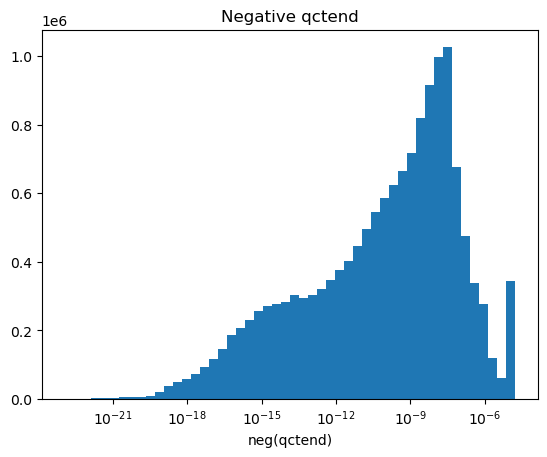

In [134]:
plot_loghist(-output["qctend_TAU"], 50)
plt.xlabel("neg(qctend)");
plt.title("Negative qctend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_qctendNeg.png")

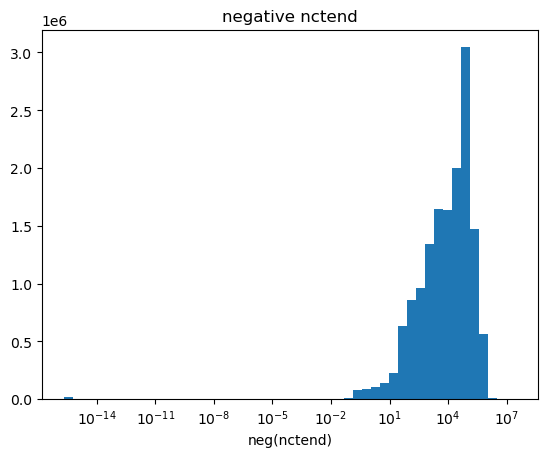

In [135]:
eps = np.finfo(np.float64).eps
nctend_TAU_eps = output["nctend_TAU"] - eps
plot_loghist(-nctend_TAU_eps, 50)
plt.xlabel("neg(nctend)");
plt.title("negative nctend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_nctendNeg.png")

In [136]:
nrtend_neg = output[output["nrtend_TAU"] < 0]["nrtend_TAU"]

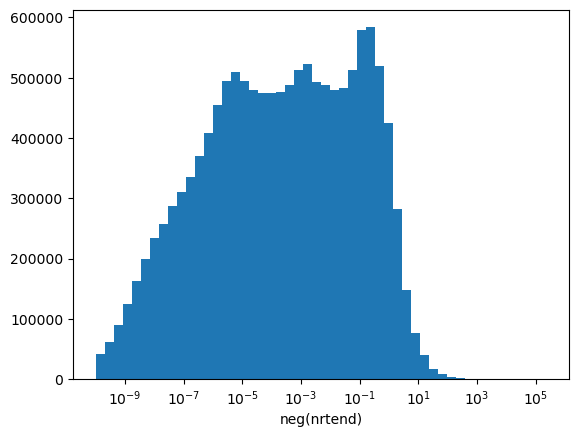

In [137]:
plot_loghist(-nrtend_neg, 50)
plt.xlabel("neg(nrtend)");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_nrtendNeg.png")

In [138]:
from math import isclose

In [139]:
np.where(output["nrtend_TAU"] == 0)

(array([], dtype=int64),)

In [140]:
nrtend_pos = output[output["nrtend_TAU"] > 0]["nrtend_TAU"]

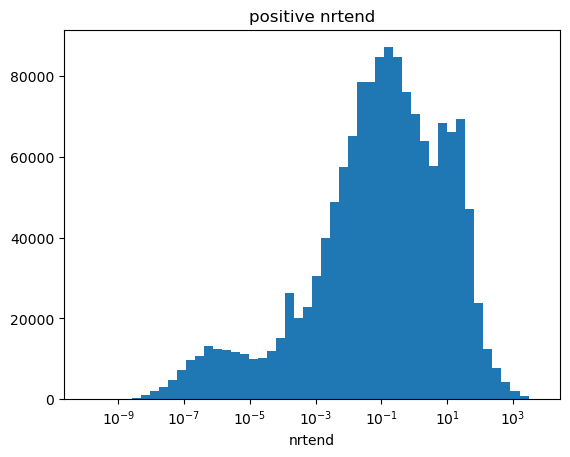

In [141]:
plot_loghist(nrtend_pos, 50)
plt.xlabel("nrtend");
plt.title("positive nrtend");
plt.savefig("/glade/u/home/wchuang/mlmicrophysics/notebooks/figs/e3sm_training_data_filterNrtend_nrtendPos.png")

Looking at first few timesteps and seeing if there's a difference

In [144]:
# Load the NetCDF file
file_path = '/glade/work/wchuang/mlmicrophysics/cesm_output/tauREV4/cam_ml_tauREV4_train.cam.h1.2005-07-04-00000.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
cesm_ds = xr.open_dataset(file_path)

file_path = '/glade/work/wchuang/mlmicrophysics/e3sm300_mlmicro11.1_tau_train/e3sm300_mlmicro11.1_tau_train.eam.h1.2001-07-04-00000.nc'  # Replace with your NetCDF file path
dataset = nc.Dataset(file_path)
e3sm_ds = xr.open_dataset(file_path)

In [146]:
cesm_singlet = cesm_ds.isel(time=[0], lev=[-1])

In [147]:
e3sm_singlet = e3sm_ds.isel(time=[0], lev=[-1])

In [154]:
cesm_singlet["NC_TAU_in"].values

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [152]:
e3sm_singlet["P3_nc_in_TAU"]

<xarray.DataArray 'P3_nc_in_TAU' (time: 1, lev: 1, ncol: 21600)>
[21600 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 998.5
  * time     (time) object 2001-07-04 00:00:00
Dimensions without coordinates: ncol
Attributes:
    mdims:         1
    units:         #/kg
    long_name:     P3 TAU Stochastic collection input nc in cloud
    cell_methods:  time: point